## P4DS: Assignment 3 (Autumn 2020)

# Data Analysis Project

#### Notebook template design: Brandon Bennett (2020/11/3)

# Data Analysis On Olympics History 


### Project participants:

* Ananthakrishnan S Nair (mm21asn@leeds.ac.uk)
* Elsa Antony (mm21ea@leeds.ac.uk)
* Sachin Santhosh (mm21ss@leeds.ac.uk)

# Project Plan

## The Data (10 marks)

The data analysis project deals with Olympic history from the first edition in 1896 till 2016. The link to the original dataset is https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results.

The dataset provides information about different countries and athletes who participated in the Olympics, the types of sports and events conducted across various editions, the host cities and the year of the Games, count of Male and Female athletes and the medals won by them(Gold, Silver, Bronze or No Medal).

The accuracy of the dataset is good enough for our analysis, although it does contain some missing values. These issues will be taken care of as part of Data Cleaning. Two CSV Files(athlete_events.csv and noc_regions.csv) had to be merged for our analysis, out of which the latter contains data related to regions.

Column Details

•	ID – A unique identification number for each athlete.

•	Name – Name of the athlete.

•	Sex – Gender of athletes(Male or Female).

•	Age – Age of each athlete when they participated.

•	Height - Height of each athlete in cm when they participated.

•	Weight - Weight of each athlete in kg when they participated.

•	Team – Name of athlete's team.

•	NOC – A three-letter code for the country name of athletes.

•	Games – The year and season in which that Olympics was held.

•	Year - Year in which that Olympics was conducted.

•	Season – Season in which each Olympics was conducted(either Winter or Summer).

•	City – Host City of that Olympics.

•	Sport – Names of different types of sports conducted.

•	Event - Names of different types of events conducted.

•	Medal – Type of medal won (NA, Gold, Silver, Bronze). ‘NA’ means no medal.

•	Region- Country name


## Project Aim and Objectives (5 marks)

The aim of this analysis can be classified into the following categories : 

* Find out the most successful country in Olympic history, and see if their success can be credited to them sending the maximum number of participants for the Olympics.
* Find out the most successful male athletes in Olympic history.
* Find out the most successful female athletes in Olympic history.
* Determine whether the number of participating countries and events per Olympics exhibit a growing trend.
* Determine whether the Olympics is growing every time in terms of participating athletes.
* Is the Olympics a Male-Dominated event? If so, what is the gender-split ratio of the participants?
* Identify the most popular and least popular sport in Olympics.
* What are the features of the athletes who participate in the most popular sport in Olympics?
* Female participation trends over the years in the Olympics, and which sports do women fancy?
* Which country produces the best sprinters, and what are their characteristics? This is done by analysing the records of 100 metres.


### Specific Objective(s)

* __Objective 1:__ Analysis to find the most successful countries in Olympics based on total medals won along with an analysis on the overall participation by each country.
* __Objective 2:__ Analysis on the female participation in Olympics over the years, and focus on the top two sports having the most female participation.
* __Objective 3:__ Genderwise analysis on 100 metres to find the dominant countries, and to study the difference between Age, Height and Weight of Medal winners with the other competitors.



## System Design (5 marks)


### Architecture

Firstly, the various libraries required for data analysis such as pandas, seaborn, plotly, matplotlib were imported. The two CSV files were read through inbuilt methods in Pandas. Since our entire analysis is focused on Summer Olympics, we filtered out the records of the Winter Olympics. The aforementioned CSV files were merged using a common column, 'NOC', following which the characteristics of the data were interpreted using methods like info, dtypes and isna(). 

Data preprocessing had to be done to change the datatype of certain columns to the desired type, and the missing values were examined and replaced with the mean of the particular column. Once the data was ready to use, the specific objectives were identified and by doing various transformations and data manipulations, the objectives were achieved. Suitable visualisation tools were used to provide a visual depiction of the results.

  
### Processing Modules and Algorithms

The following components are included in the architecture:

Data cleaning: Columns containing missing values(eg: age, height, weight) were replaced by mean and other columns having missing values were replaced by a specific value (eg: 'NaN' values in column medal is replaced by 'No Medal').

Combining Dataset: The two CSV files used were combined using the pandas 'merge' function.

Renaming columns: Some column names were renamed using the pandas 'rename' function.

Checking Outliers: Outliers were checked using seaborn's boxplot. Since this is the Olympics dataset, removing outliers from certain columns wouldn't make any sense, and hence these were not removed. 

Converting samples to a special representation: Using pandas 'get_dummies' function, the 'Medal' column was converted to 3 different columns Gold, Silver, Bronze.

Data visualization: Various types of techniques were used for visualization such as boxplot, line graph, bar graph, sunburst, donut chart, heatmap etc.

In [1]:
# The following packages were imported for this project.
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns   
import plotly.graph_objects as go
import plotly.figure_factory as mm
# package to ignore warnings
import warnings
warnings.filterwarnings('ignore')

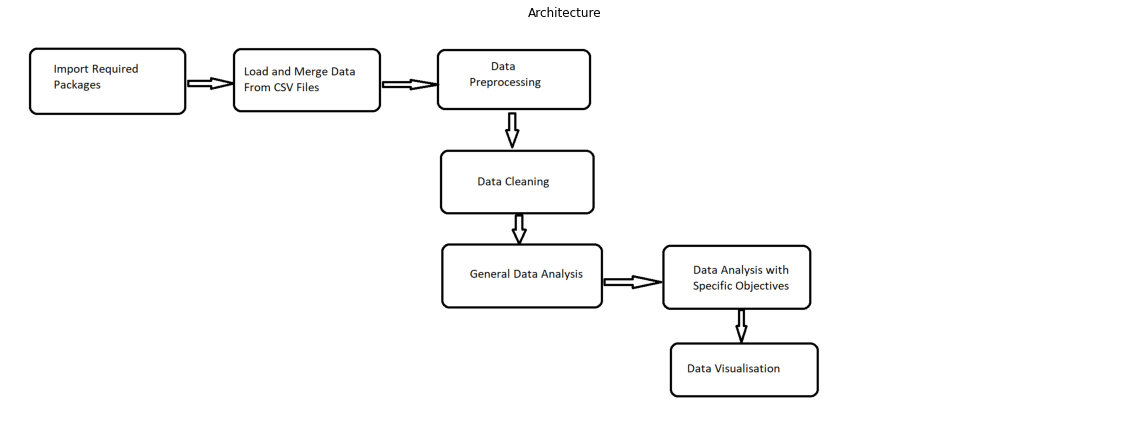

In [2]:
# This is the entire process flow of this project
import matplotlib.image as flowchart
img=flowchart.imread('Flow chart.png')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Architecture')
diagram=plt.imshow(img)

# Program Code (15 marks)


# Data Exploration

In [3]:
# Loading datasets from the two csv files
athletes = pd.read_csv("athlete_events.csv")
regions  = pd.read_csv("noc_regions.csv")
# Filtering data for only Summer season as we are doing analysis only for Summer season
filtered_data=athletes[athletes['Season']=='Summer']
# The two files are merged together using pandas merge function 
current_df=pd.merge(filtered_data,regions,on='NOC',how='left')

In [4]:
# Displaying the dataframe
current_df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  
0   Basketball Men's Basketball   NaN        China   NaN  
1  Judo Men's Extra-Lightweight   NaN        China   NaN  
2       Football Men's Football   NaN      Denmark   NaN  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [5]:
# Checking the shape and datatypes of the  dataframe
print(current_df.shape)
print(current_df.dtypes)

(222552, 17)
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object


In [6]:
# Checking for null values
current_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region        21
notes     218151
dtype: int64

# Data Cleaning

In [7]:
# Replacing NaN values in current_df['Age'],current_df['Height'],current_df['Weight'] with 0 and changing datatypes to 'int64'
current_df['Age']=current_df['Age'].fillna(0).astype("int64")
current_df['Height']=current_df['Height'].fillna(0).astype("int64")
current_df['Weight']=current_df['Weight'].fillna(0).astype("int64")

In [8]:
# Replacing all 0 values in df['Age'],df['Height'],df['Weight'] with mean of df['Age'],df['Height'],df['Weight'] respectively
data_cols=['Age','Height','Weight']
for x in data_cols:
    current_df[x]=current_df[x].replace(0,current_df[x].mean())

In [9]:
# Dropping column ,'notes' as that column is unnecessary
current_df.drop('notes',axis=1,inplace=True)

In [10]:
# Filling the 'NaN' values in current_df['Medal'] with 'No Medal'
current_df['Medal'] = current_df['Medal'].fillna("No Medal")

In [11]:
# Checking for null values again
current_df.isna().sum()

ID         0
Name       0
Sex        0
Age        0
Height     0
Weight     0
Team       0
NOC        0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
region    21
dtype: int64

In [12]:
# Dropping rows that contain 'NA' value in the column 'region'.
current_df.dropna(axis=0,inplace=True,how='any')

In [13]:
# Checking for null values again. Data has no null values now.
current_df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [14]:
#Created a dummy dataframe for column 'Medal'
dummy_dataframe=pd.get_dummies(current_df['Medal'])

In [15]:
# Displaying dummy_dataframe.
dummy_dataframe

Bronze  Gold  No Medal  Silver
0            0     0         1       0
1            0     0         1       0
2            0     0         1       0
3            0     1         0       0
4            0     0         1       0
...        ...   ...       ...     ...
222547       0     0         1       0
222548       0     0         1       0
222549       0     0         1       0
222550       0     0         1       0
222551       0     0         1       0

[222531 rows x 4 columns]

In [16]:
# Dropped 'No Medal' column  from dummy_dataframe
dummy_dataframe.drop('No Medal',axis=1,inplace=True)
dummy_dataframe

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[222531 rows x 3 columns]

In [17]:
# Concatenating both current_df and dummy_dataframe to get the final dataframe
final_df = pd.concat([current_df,dummy_dataframe], axis = 1)
# created a copy
athletes_df2 = final_df.copy()

In [18]:
# The games conducted in the year 1906 is not recognised by the International Olympic Committee. Hence, those records are being dropped.
athletes_df2.drop(athletes_df2[athletes_df2['Year'] == 1906].index, inplace=True)
final_df = athletes_df2.copy()
# Exported to a csv file
# final_df.to_csv("Athlete_final.csv")

In [19]:
final_df.shape

(220798, 19)

In [20]:
# checking for number of duplicate rows in dataframe
final_df.duplicated().sum()

1385

In [21]:
# droping those duplicates in dataframe
final_df.drop_duplicates(inplace = True)

In [22]:
# Rechecking again for duplicates
final_df.duplicated().sum()

0

**NOTE:**

***Consider a team event like football. Brazil won the Olympic Gold in Men's Football in 2016. When filters were applied to the dataset, this gave 17 different records each having the 'Gold' column value as 1. This was a misleading insight suggesting that Brazil won 17 Gold medals in Men's Football in 2016. Therefore it is imperative to remove duplicates based on the following columns so that there will only be a single row that shows that Brazil won the Olympic Gold in Men's football in 2016.***

**['Medal','NOC','Sport','Year','Event','Games','Team','City']**

In [23]:
# Dropping Duplicates based on 'Medal','NOC','Sport','Year','Event','Games','Team','City'
final_dataframe=final_df.drop_duplicates(subset=['Medal','NOC','Sport','Year','Event','Games','Team','City'])

In [24]:
# showing the final number of rows and columns 
final_dataframe.shape

(104929, 19)

In [25]:
# Renaming the columns
final_dataframe.rename(columns={'region':'Country'},inplace=True)

In [26]:
#changing datatypes of Age,Height,Weight from float64 to int64
final_dataframe['Age'] = final_dataframe['Age'].astype("int64")
final_dataframe['Height'] = final_dataframe['Height'].astype("int64")
final_dataframe['Weight'] = final_dataframe['Weight'].astype("int64")
#changing datatypes of Bronze,Gold,Silver from uint8 to int64
final_dataframe['Bronze']=final_dataframe['Bronze'].astype('int64')
final_dataframe['Gold']=final_dataframe['Gold'].astype('int64')
final_dataframe['Silver']=final_dataframe['Silver'].astype('int64')

In [27]:
# Displaying the datatypes
final_dataframe.dtypes

ID          int64
Name       object
Sex        object
Age         int64
Height      int64
Weight      int64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
Country    object
Bronze      int64
Gold        int64
Silver      int64
dtype: object

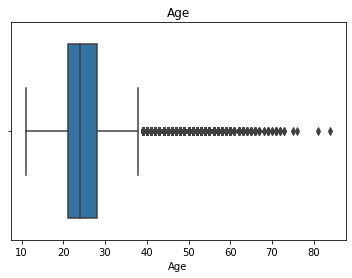

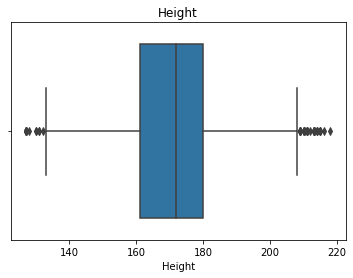

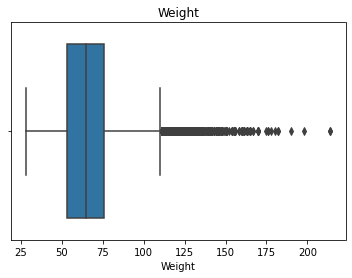

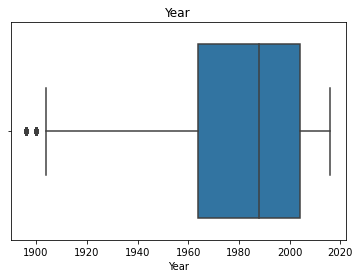

In [28]:
# Checking for outliers
# Made a list containing  columns Age,Height,Weight,Year
numcolumns=['Age','Height','Weight','Year']
# Checking for outliers using for loop and boxplot
for x in numcolumns:
    sns.boxplot(final_dataframe[x])
    plt.title(x)
    plt.show()

**NOTE: Even though columns Age, Height, Weight, Year have some outliers, we can't remove them as this is an Olympics dataset and removing the outliers doesn't make any sense.**

# General Data Analysis
**NOTE: In this section we will be doing some general data analysis on the Olympics data along with suitable visualisations. After that, we will be moving to specific objectives.**

# Analysis on the Number of countries participated per Olympics,Events conducted per Olympics and Number of Athletes participated per Olympics

In [29]:
# Analysis on the Number of participating countries per Olympics
# Created a dataframe and dropped duplicates based on 'Year','Country' to get count of unique countries per Olympics
ddd=final_dataframe.drop_duplicates(['Year','Country'])
#Created a dataframe by grouping the above dataframe based on year and counting country,sorting it and resetting the index
Nations_participation_per_year=ddd.groupby('Year').count()['Country'].sort_values(ascending=False).reset_index()
# Renaming the dataframe
Nations_participation_per_year.rename(columns={'Country':'Number of Countries Participated'},inplace=True)
# Displaying the dataframe
Nations_participation_per_year.sort_values(by="Year",ascending=True,inplace=True)
Nations_participation_per_year

Year  Number of Countries Participated
27  1896                                12
22  1900                                31
26  1904                                14
25  1908                                22
24  1912                                28
23  1920                                29
21  1924                                45
20  1928                                46
19  1932                                47
18  1936                                49
17  1948                                59
16  1952                                67
15  1956                                71
13  1960                                83
11  1964                                93
10  1968                               111
9   1972                               120
12  1976                                91
14  1980                                80
8   1984                               139
7   1988                               156
6   1992                               168
5   1996                               196
4   2000                               199
3   2004                               200
2   2008                               202
1   2012                               203
0   2016                               204

In [30]:
# Analysis on Number of Events conducted per Olympics
# Created a dataframe and dropped duplicates based on 'Year','Event' to get count of unique events per Olympics
ddd_events=final_dataframe.drop_duplicates(['Year','Event'])
#Created a dataframe by grouping the above dataframe based on year and counting country,sorting it and resetting the index
Events_per_year=ddd_events.groupby('Year').count()['Event'].sort_values(ascending=False).reset_index()
# Renaming the dataframe
Events_per_year.rename(columns={'Event':'Number of Events occured per year'},inplace=True)
# Displaying the dataframe
Events_per_year.sort_values(by="Year",ascending=True,inplace=True)
Events_per_year

Year  Number of Events occured per year
27  1896                                 43
26  1900                                 90
25  1904                                 95
23  1908                                109
24  1912                                107
14  1920                                158
21  1924                                131
22  1928                                122
20  1932                                131
18  1936                                150
15  1948                                153
19  1952                                149
16  1956                                151
17  1960                                150
13  1964                                163
12  1968                                172
11  1972                                193
10  1976                                198
9   1980                                203
8   1984                                221
7   1988                                237
6   1992                                257
5   1996                                271
4   2000                                300
3   2004                                301
2   2008                                302
1   2012                                302
0   2016                                306

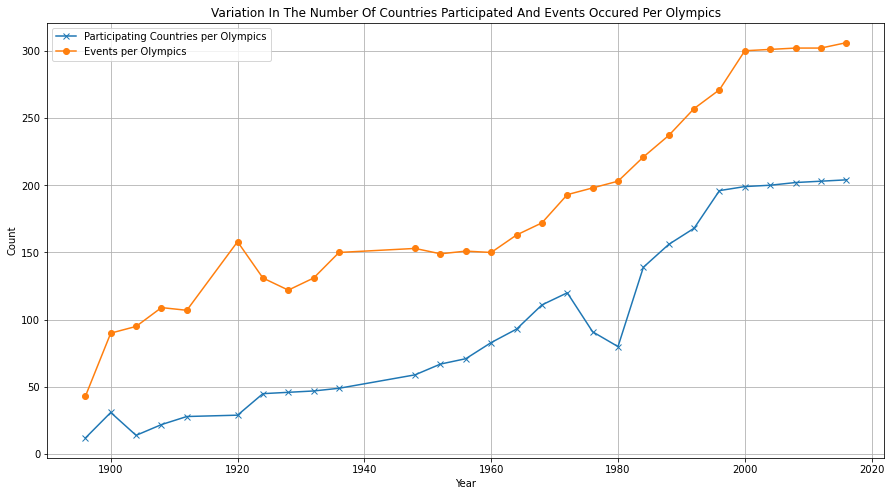

In [31]:
# Visualizing the above two analysis using plot function from pyplot package to plot Year vs Number of Countries. 
# participated per year and Events happened in Olympics till 2016

# Created figure size
plt.figure(figsize=(15,8))
# using plot function to plot Year vs Number of Countries participated per year
plt.plot(Nations_participation_per_year['Year'],Nations_participation_per_year['Number of Countries Participated'],
         label='Participating Countries per Olympics',marker="x")
# using plot function to plot Year vs Number of Events occured per year
plt.plot(Events_per_year['Year'],Events_per_year['Number of Events occured per year'],label='Events per Olympics',
         marker="o")
# Given xlabel
plt.xlabel('Year')
# Given ylabel
plt.ylabel('Count')
# Given title
plt.title('Variation In The Number Of Countries Participated And Events Occured Per Olympics')
# Given legend
plt.legend()
# Given grid
plt.grid() 
# Displaying the plots
plt.show()

**Interpretation of the above analysis:**

**Generally, an increasing trend can be seen in the count of both the participating countries and events conducted per Olympics. When the country plot is examined, a sudden increase and decrease could be seen in the first three editions of the game, till 1904. A steady rise till 1972 followed, and the subsequent two editions saw a massive decline in the participation of countries owing to many political reasons, which is beyond the scope of our analysis. Since then, the participating country count has kept on increasing, and the 2016 Olympics had 204 nations participating in it.**

**Similarly, the event's plot also exhibited an upward trend except for the years 1924, 1928 and 1952. What started out with close to 50 events in the first edition has now just over 300 different events in the latest edition in 2016.**

In [32]:
# Analysis on Number of Athletes participated per Olympics
# Created a dataframe and dropped duplicates based on 'Year','Name' to get count of unique names os athletes
ddd_athletes=final_dataframe.drop_duplicates(['Year','Name'])
#Created a dataframe by grouping the above dataframe based on year and counting country,sorting it and reseting the index
athletes_participation_per_year=ddd_athletes.groupby('Year').count()['Name'].sort_values(ascending=False).reset_index()
# Renaming the dataframe
athletes_participation_per_year.rename(columns={'Name':'Number of Athletes participated per year'},inplace=True)
# Displaying the dataframe
athletes_participation_per_year.sort_values('Year',ascending=False, inplace = True)
athletes_participation_per_year

Year  Number of Athletes participated per year
0   2016                                      6360
1   2012                                      6299
2   2008                                      6286
4   2004                                      6041
3   2000                                      6076
5   1996                                      5780
6   1992                                      5253
7   1988                                      4670
8   1984                                      3704
13  1980                                      2751
10  1976                                      3137
9   1972                                      3650
11  1968                                      2894
14  1964                                      2646
12  1960                                      2799
18  1956                                      1754
15  1952                                      2385
16  1948                                      2045
17  1936                                      1935
22  1932                                       943
19  1928                                      1464
20  1924                                      1441
21  1920                                      1068
23  1912                                       794
24  1908                                       655
26  1904                                       265
25  1900                                       422
27  1896                                       123

In [33]:
# Using line function  from plotly package to plot and visualize Year vs Number of Athletes participated per year
lineplot=px.line(athletes_participation_per_year,x='Year',y='Number of Athletes participated per year',
                 title='Athletes Participated Per Olympics')
lineplot.show()

**Interpretation of the above analysis:**

**Generally, the number of athletes who participated is increasing gradually after each Olympics. In 1932 and 1956, there is a slight drop in participation. From 1972 to 1980 also there is a sharp dip in the number of athletes who participated. However, the trend has been on the rise since 1980.**

In [34]:
# Analysis on the genderwise participation of athletes in Olympics
# A dataframe is made which ony contains unique athletes names for a country
unique_atheles=final_dataframe.drop_duplicates(subset=['Name','Country'])
# Created a dataframe for  males 
Males_df=unique_atheles[unique_atheles['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
# Created a dataframe for  women 
Women_df=unique_atheles[unique_atheles['Sex']=='F'].groupby('Year').count()['Name'].reset_index()
# Made a new dataframe my merging Males_df and Women_df to get the number of men and women participated per year in Olympics
Gender_Dataframe=pd.merge(Males_df,Women_df,on='Year',how="left").fillna(0).astype("int64")
# Renaming the dataframe
Gender_Dataframe.rename(columns={'Name_x':'Number of Men','Name_y':'Number of Women'},inplace=True)
#Displaying the dataframe
Gender_Dataframe

Year  Number of Men  Number of Women
0   1896            122                0
1   1900            401               13
2   1904            250                4
3   1908            613               16
4   1912            666               27
5   1920            929               50
6   1924           1161               84
7   1928           1103              134
8   1932            696               81
9   1936           1535              165
10  1948           1709              216
11  1952           1736              222
12  1956           1184              187
13  1960           2033              275
14  1964           1770              298
15  1968           1880              361
16  1972           2411              458
17  1976           1930              462
18  1980           1795              403
19  1984           2496              669
20  1988           2851              908
21  1992           2808             1226
22  1996           2955             1322
23  2000           2652             1631
24  2004           2421             1606
25  2008           2478             1724
26  2012           2388             1783
27  2016           2400             1822

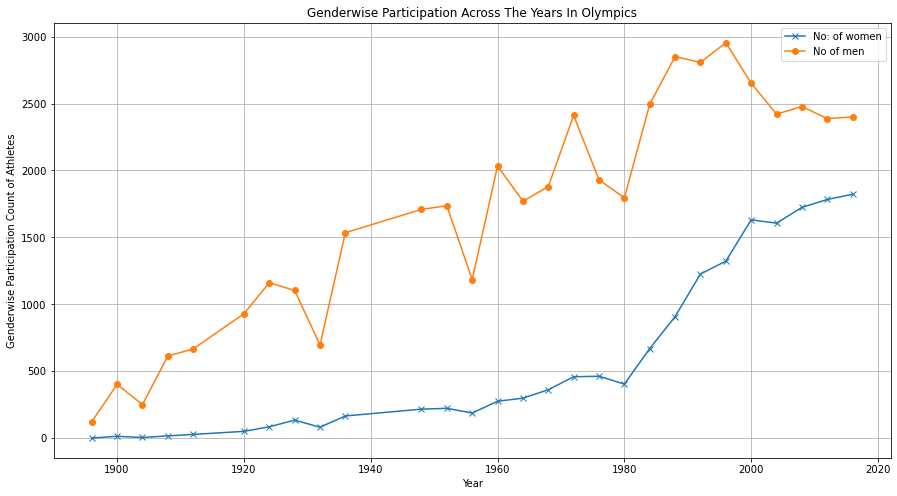

In [35]:
# Visualizing the above analysis using plot function from pyplot package to plot 
# Genderwise Participation Count of Athletes vs Year till 2016 Olympics

# Created figure size
plt.figure(figsize=(15,8))
# using plot function to plot Year vs Number of Women
plt.plot(Gender_Dataframe['Year'],Gender_Dataframe['Number of Women'],label='No: of women',marker="x")
# using plot function to plot Year vs Number of Men
plt.plot(Gender_Dataframe['Year'],Gender_Dataframe['Number of Men'],label='No of men',marker="o")
# Given xlabel,ylabel,legend and grid
plt.xlabel('Year')
plt.ylabel('Genderwise Participation Count of Athletes')
plt.title('Genderwise Participation Across The Years In Olympics')
plt.legend()
plt.grid() 
# Displaying the plots
plt.show()

**Interpretation of the above analysis:**

**The plot suggests that Males have been active participants in the Olympics than Females. Although the count of males has tended to fluctuate a lot with time, it has been significantly higher than that of females. Female participation, on the other hand, has been relatively quiet until 1980, with just about 400 participants in that edition. However, a surge in their participation was seen post-1980, and the latest Olympics recorded female participation of 1822.**

In [36]:
#Analysis to show the 'PARTICIPATION PERCENTAGE OF MEN AND WOMEN TILL 2016 OLYMPICS'
# Created a dataframe to show value counts of men and women
Sex_Dataframe_counts=final_dataframe['Sex'].value_counts()
Sex_Dataframe_counts=Sex_Dataframe_counts.reset_index()
#Renamed the columns
Sex_Dataframe_counts.rename(columns={'index':'Gender','Sex':'Count'},inplace=True)
# Replace 'M' with 'Men' and 'F' with 'Women'
Sex_Dataframe_counts['Gender'].replace('M','Men',inplace=True)
Sex_Dataframe_counts['Gender'].replace('F','Women',inplace=True)
#Displaying the dataframe
Sex_Dataframe_counts

Gender  Count
0    Men  76047
1  Women  28882

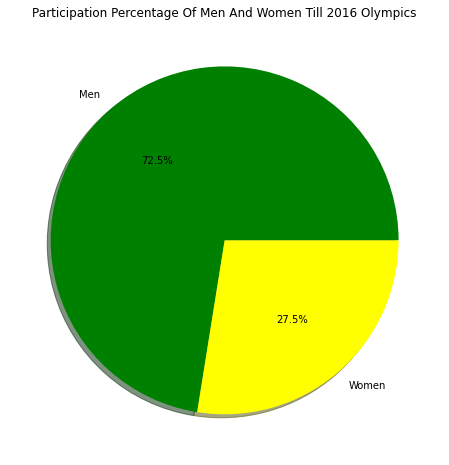

In [37]:
# Using pie function from pyplot package we are showing the total percentage of Men and Women Athletes participated
# till 2016 Olympics
# Putting figure size
plt.figure(figsize=(15,8))
# Create a lsit to give colours
colors=['green', 'yellow']
# Created pie chart
plt.pie(Sex_Dataframe_counts['Count'],labels=Sex_Dataframe_counts['Gender'],colors=colors,autopct='%1.1f%%',shadow=True)
# Gave title to the chart
plt.title('Participation Percentage Of Men And Women Till 2016 Olympics')
# Displaying the chart
plt.show()

**Interpretation of the above analysis:**

**As the pie chart elucidates, 72.5% of the overall participation in the Olympics are by Men, with Women accounting for the remaining 27.5%.**

 **Next analysis is a Sports-based analysis to find the most famous and least famous sport  in Olympics by checking  the number of events related to that particular sport and also analysing  the  variation of height and weight of different athletes(Genderwise) participated for the most famous sport.**

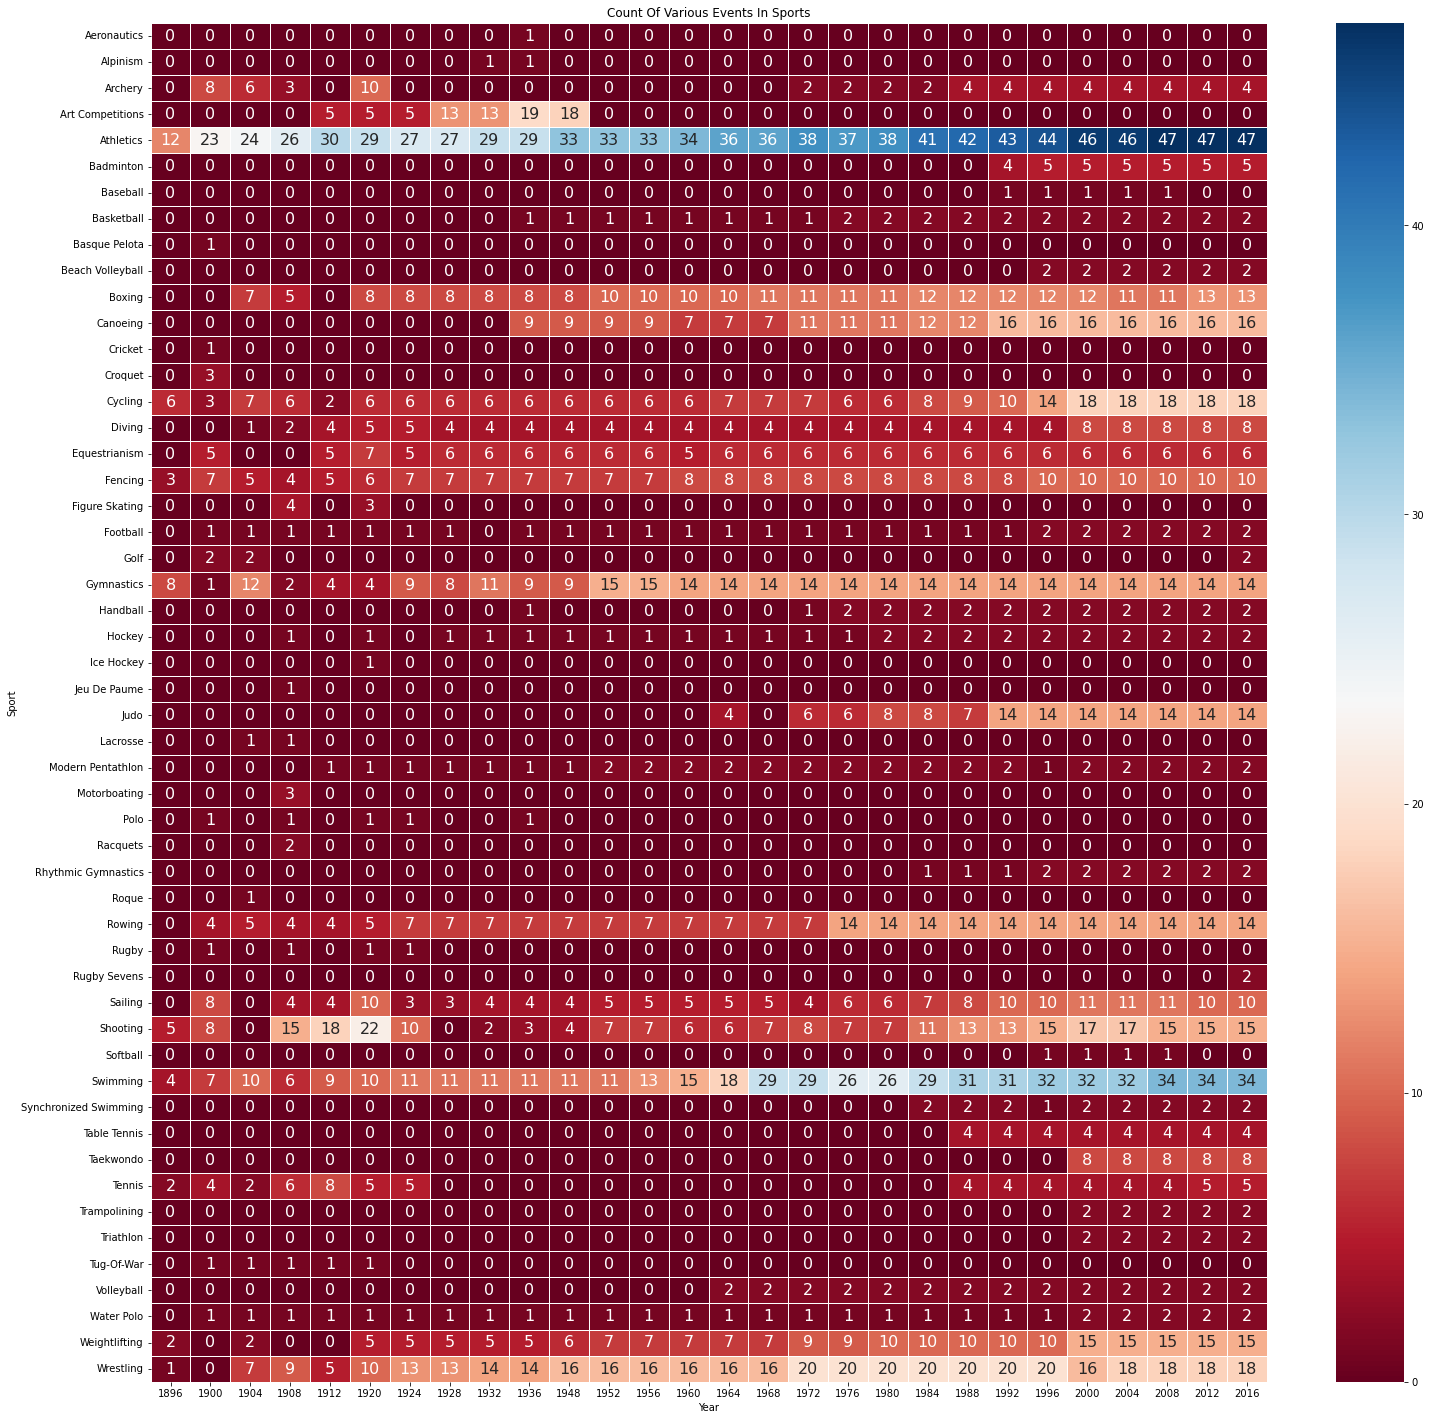

In [38]:
# Heatmap analysis to find the most common sport in Olympics by analysing the number of events related to that particular sport
# Created a dataframe and dropped duplicates based on 'Year','Sport','Event' inorder to get unique events only per sports 
ff=final_dataframe.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(25,25))
sns.heatmap(ff.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0),
            cmap='RdBu',linewidth=1,linecolor='White',annot=True,annot_kws={'fontsize':16})
plt.title('Count Of Various Events In Sports')
plt.show()

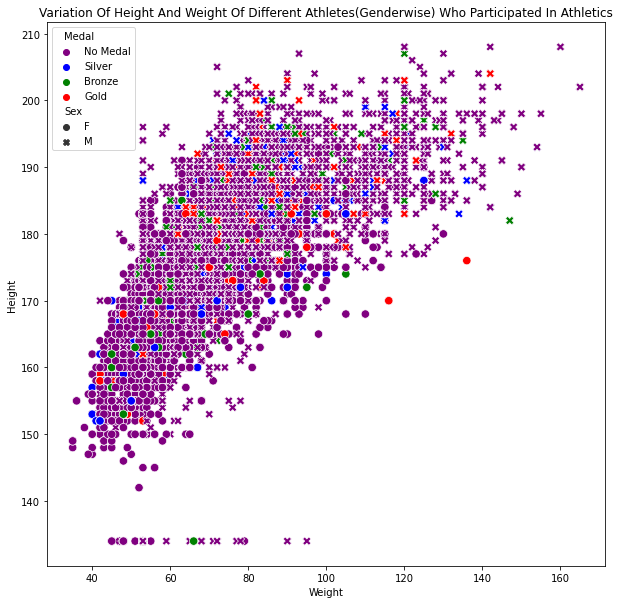

In [39]:
# Since the most popular sports in Olympics is Athletics,the below analysis is related to Athletics
# Analysis of variation of Height and weight of Different Athletes(Genderwise) participated for Athletics. 
plt.figure(figsize=(10,10))
# Filtered athletics from sports and created a dataframe for athletics
sports_df=final_dataframe[final_dataframe['Sport']=='Athletics']
# created scattterplot for analysis
sns.scatterplot(sports_df['Weight'],sports_df['Height'],hue=sports_df['Medal'],
                palette = ['purple', 'blue','green','red'],style=sports_df['Sex'],s=70)
plt.title('Variation Of Height And Weight Of Different Athletes(Genderwise) Who Participated In Athletics')
plt.show()

**Interpretation of the above analysis:**

**As evident from the heatmap, the most famous sport in Olympics is Athletics, followed by Swimming, as there are many events conducted for these sports. Similarly, many sports are the least famous in Olympics, e.g., Ice hockey is the least famous as only one event is conducted for Ice hockey in the entire Olympics history.**

**From the scatterplot, it is clear that athletes who didn't win any medal are very high in number than those who won some medals. In the case of a gold medal, men who won more gold medals are generally taller than 180cm, whereas women who won more gold medals are less than 180cm. For bronze medal, women who won bronze are less than 175cm tall, and most of them weigh less than 75kg, whereas men who achieved bronze are very tall, as most of them are above 185cm and weigh more than 75kg. In the case of the silver medal also men have who achieved it are generally taller than 180cm and weighs more than 80kg, whereas for a woman, in this case, their height is mostly less than 172cm(very short women are also there having a height between 150 and 160cm), and weight varies from lightweight (less than 60kg) to heavy women (more than 80kg).**

**The subsequent analysis is an athlete-based one to find the top 5 most successful male and female athletes in the Olympics by checking the number of gold medals won by each athlete.**

In [40]:
# Analysis of top most successful male athletes
# The below dataframe 'atheletes_df2' is a copy of the original dataframe before dropping duplicates
# (check row 19 of this notebook)
# We need to the  dataframe before removing duplicates ('atheletes_df') to get total count of number of gold medals
# Renaming the dataframe with Country column
athletes_df2.rename(columns={'region':'Country'},inplace=True)
#filtering column for male atheletes who have won gold medals
athletes_df_Male=athletes_df2[(athletes_df2['Sex']=='M') & (athletes_df2['Medal']=='Gold')].groupby(['Country','Name']).count()['Medal'].reset_index()
athletes_df_Male.rename(columns={'Medal':'Number of Gold Medals Won'},inplace=True)
Most_successful_Men_Athletes=athletes_df_Male.sort_values(by='Number of Gold Medals Won',ascending=False).reset_index()
Most_successful_Men_Athletes.drop('index',axis=1,inplace=True)
#Displaying the dataframe
Most_successful_Men_Athletes

Country                            Name  Number of Gold Medals Won
0         USA         Michael Fred Phelps, II                         23
1     Finland            Paavo Johannes Nurmi                          9
2         USA               Mark Andrew Spitz                          9
3         USA  Frederick Carlton "Carl" Lewis                          9
4         USA  Matthew Nicholas "Matt" Biondi                          8
...       ...                             ...                        ...
6589    India           Shabban Shahab-ud-Din                          1
6590    India            Sayed Muhammad Yusuf                          1
6591    India          Sayed Muhammad Hussain                          1
6592    India           Sardar Mohammad Aslam                          1
6593  Vietnam                   Hong Xun Vinh                          1

[6594 rows x 3 columns]

In [41]:
# Visualization of the most successful top 5 men athletes is done using plotly's sunburst chart
Top_Men_Athletes=Most_successful_Men_Athletes[:5]
fig=px.sunburst(Top_Men_Athletes,path=['Country','Name'],values='Number of Gold Medals Won',color='Number of Gold Medals Won',
              color_continuous_scale='tealgrn'
                ,title='Top 5 Most Successful Male Athletes Till 2016 Olympics')
fig.show()

In [42]:
# Analysis of most successful female athletes
# This dataframe 'athletes_df2' is a copy of the original dataframe before dropping duplicates (check row 21 of this notebook)
# We need to take dataframe before removing duplicates to get total count of number of gold medals
# Renaming the dataframe with Country column
athletes_df2.rename(columns={'region':'Country'},inplace=True)
#filtering column for female atheletes who have won gold medals
athletes_df_Women=athletes_df2[(athletes_df2['Sex']=='F') & (athletes_df2['Medal']=='Gold')].groupby(['Country','Name']).count()['Medal'].reset_index()
athletes_df_Women.rename(columns={'Medal':'Number of Gold Medals Won'},inplace=True)
Most_successful_Women_Athletes=athletes_df_Women.sort_values(by='Number of Gold Medals Won',ascending=False).reset_index()
Most_successful_Women_Athletes.drop('index',axis=1,inplace=True)
#Displaying the dataframe
Most_successful_Women_Athletes

Country                                             Name  \
0             Russia               Larysa Semenivna Latynina (Diriy-)   
1            Germany                           Birgit Fischer-Schmidt   
2                USA  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)   
3     Czech Republic                           Vra slavsk (-Odloilov)   
4                USA                   Amy Deloris Van Dyken (-Rouen)   
...              ...                                              ...   
2276           Japan                                  Kaori Matsumoto   
2277           Japan                       Juri Yokoyama (-Nishikawa)   
2278           Japan                         Hitomi Obara (Sakamoto-)   
2279           Japan                             Hiromi Yano (-Ikeda)   
2280        Zimbabwe                              Susan "Sue" Huggett   

      Number of Gold Medals Won  
0                             9  
1                             8  
2                             8  
3                             7  
4                             6  
...                         ...  
2276                          1  
2277                          1  
2278                          1  
2279                          1  
2280                          1  

[2281 rows x 3 columns]

In [43]:
# Visualization of the Top 5 Most successful Women athletes is done using plotly's sunburst chart
Top_Women_Athletes=Most_successful_Women_Athletes[:5]
fig=px.sunburst(Top_Women_Athletes,path=['Country','Name'],values='Number of Gold Medals Won',color='Number of Gold Medals Won',
               color_continuous_scale='blackbody',title='Top 5 Most Successful Female Athletes Till 2016 Olympics')
fig.show()

**Interpretation of the above analysis:**

**The names of the most successful top 5 male and female athletes are displayed in the sunburst chart along with the number of gold medals won.**

# Objective 1
**Country-wise analysis to find the most successful 10 countries in Olympics based on total medals won and analysis on the overall participation by top 10 countries(checking gender-wise also) ie, to find top countries with maximum participation.**

In [44]:
# Analysis to find the most successful 10 countries in Olympics
# A dataframe is created by grouping each countries and taking sum of medals they achieved 
medal_rank_dataframe=final_dataframe.groupby('Country').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()
# A new column called 'Total Medals' is created to this dataframe ,by adding 'Silver','Gold','Bronze' medals together
medal_rank_dataframe['Total_Medals']=medal_rank_dataframe['Silver']+medal_rank_dataframe['Gold']+medal_rank_dataframe['Bronze']
#Displaying the dataframe
medal_rank_dataframe

Country  Gold  Silver  Bronze  Total_Medals
0              USA  1023     797     702          2522
1           Russia   592     498     487          1577
2          Germany   440     451     487          1378
3               UK   270     305     295           870
4            China   228     163     154           545
..             ...   ...     ...     ...           ...
201        Lesotho     0       0       0             0
202        Liberia     0       0       0             0
203        Albania     0       0       0             0
204  Liechtenstein     0       0       0             0
205          Libya     0       0       0             0

[206 rows x 5 columns]

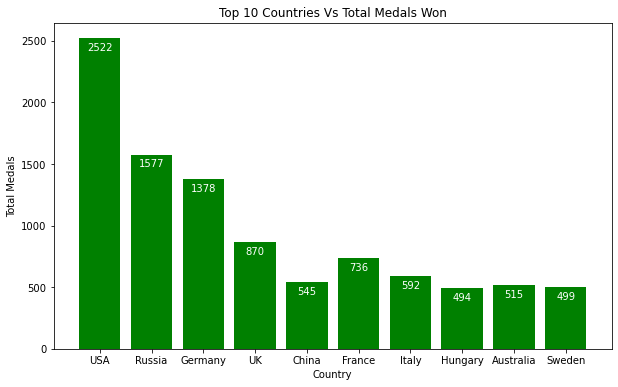

In [45]:
# A bar graph is used with total medals won displayed on each bar to visualize the above analysis.
# A dataframe is created to select top 10 countries from medal_rank_dataframe 
COUNTRY_DF=medal_rank_dataframe['Country'][:10]
# A dataframe is created to select corresponding total medals won by top 10 countries from medal_rank_dataframe 
TOP_Total_Medals=medal_rank_dataframe['Total_Medals'][:10]
# Code is as follows
COUNTRIES=[]
Total_Medals=[]
for i in range(len(COUNTRY_DF)):
    COUNTRIES.append(medal_rank_dataframe['Country'].iloc[i])
for i in range(len(TOP_Total_Medals)):
    Total_Medals.append(medal_rank_dataframe['Total_Medals'].iloc[i])  
#created a dictionary with keys as COUNTRIES and values as Total_Medals
DD=dict(zip(COUNTRIES,Total_Medals))  
# using plt package and bar graph to display
plt.figure(figsize=(10,6))
plt.bar(COUNTRIES,Total_Medals,color='green')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Top 10 Countries Vs Total Medals Won')
# For displaying countries in descending order 
sorted_dd_items=sorted(DD.items(),key= lambda x: (x[1],x[0]))
for k,v in sorted_dd_items:
     plt.text(k,v-100,int(v),horizontalalignment='center',color='w')
plt.show()

In [46]:
# Analysis on the top 10 countries with maximum participation count and percentage in olympics 
# A dataframe is created to take the value counts of countries to get participation count
top_participated_countries=final_dataframe['Country'].value_counts().reset_index()
top_participated_countries.rename(columns={'index':'Country','Country':'Total Participation Count'},inplace=True)
# Displaying dataframe
top_participated_countries

Country  Total Participation Count
0            USA                       5957
1        Germany                       4899
2             UK                       4107
3         Russia                       3945
4         France                       3867
..           ...                        ...
201     Kiribati                         11
202       Brunei                         10
203  Timor-Leste                          8
204       Kosovo                          8
205  South Sudan                          3

[206 rows x 2 columns]

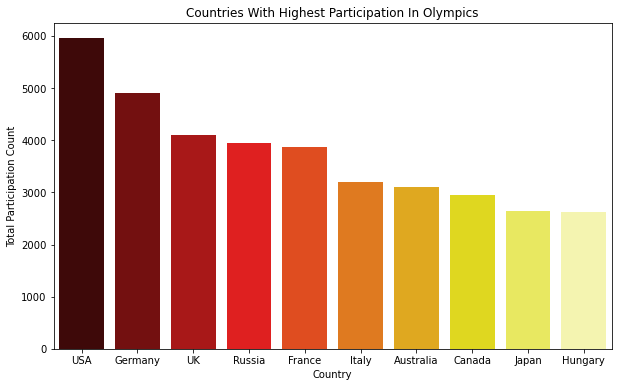

In [47]:
# A seaborn barplot is used to display the top countries with biggest overall participation 
plt.figure(figsize=(10,6))
# select top 10 countries
x=top_participated_countries['Country'][:10]
# selected corresponding particpation count of each country
y=top_participated_countries['Total Participation Count'][:10]
#z=top_participated_countries['Total Participation Percentage']
sns.barplot(x,y,palette='hot')
plt.title('Countries With Highest Participation In Olympics')
plt.show()

In [48]:
# This analysis is a part of previous analysis as here amoung those top 10 countries we do genderwise participation check.
# Analysis on genderwise participation on Top 10 countries having maximum participation in Olympics 
# Created dataframe by grouping country and sex
nm=final_dataframe.groupby(['Country','Sex']).count()['Team'].reset_index()
# Took the top 10 countries having maximum overall participation
gh=nm[(nm['Country']=='USA') | (nm['Country']=='Germany') | (nm['Country']=='UK') | (nm['Country']=='Russia')
  | (nm['Country']=='France')| (nm['Country']=='Italy') | (nm['Country']=='Australia') | (nm['Country']=='Canada')
  | (nm['Country']=='Japan') | (nm['Country']=='Hungary') ].reset_index()
gh.drop('index',inplace=True,axis=1)
gh.rename(columns={'Team':'Genderwise Participation Count'},inplace=True)
gh['Sex']=gh['Sex'].map({'M':'Men','F':'Women'})
#Displaying dataframe
gh

Country    Sex  Genderwise Participation Count
0   Australia  Women                            1072
1   Australia    Men                            2029
2      Canada  Women                             973
3      Canada    Men                            1978
4      France  Women                             909
5      France    Men                            2958
6     Germany  Women                            1511
7     Germany    Men                            3388
8     Hungary  Women                             662
9     Hungary    Men                            1971
10      Italy  Women                             760
11      Italy    Men                            2430
12      Japan  Women                             804
13      Japan    Men                            1841
14     Russia  Women                            1313
15     Russia    Men                            2632
16         UK  Women                            1191
17         UK    Men                            2916
18        USA  Women                            1663
19        USA    Men                            4294

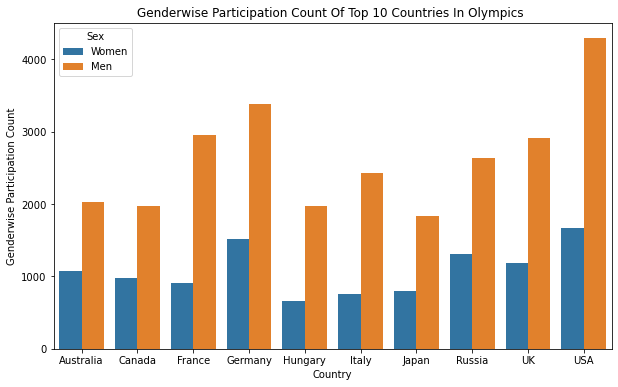

In [49]:
# A seaborn barplot is used for the above analysis
plt.figure(figsize=(10,6))
# select top 10 countries
x=gh['Country']
# selected corresponding participation count of each country
y=gh['Genderwise Participation Count']
#z=top_participated_countries['Total Participation Percentage']
sns.barplot(x,y,hue='Sex',data=gh)
plt.title('Genderwise Participation Count Of Top 10 Countries In Olympics ')
plt.show()

# Objective 2 - Female Participation in Olympics Over the years

It is evident from the genderwise participation analysis graph that there was no female participation in the ancient Olympic games held in 1896 and had very limited participation for many years. Here, the analyses are done to explore and emphasise female participation in Olympics over the years till 2016. Further, it is focused on the top two sports events with more female participation.

In [50]:
final_df.rename(columns={"region":"Country"},inplace=True)
final_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Country',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [51]:
# Data related to the female athletes alone is retrieved from the cleaned dataset to form a new dataframe named "female_alone"
female_alone = final_df[final_df["Sex"]=="F"]
female_alone

ID                                 Name Sex   Age  Height  \
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0   
5            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0   
8           13                   Minna Maarit Aalto   F  30.0   159.0   
9           13                   Minna Maarit Aalto   F  34.0   159.0   
33          21            Ragnhild Margrethe Aamodt   F  27.0   163.0   
...        ...                                  ...  ..   ...     ...   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0   
222544  135563            Olesya Nikolayevna Zykina   F  19.0   171.0   
222545  135563            Olesya Nikolayevna Zykina   F  23.0   171.0   
222551  135568               Olga Igorevna Zyuzkova   F  33.0   171.0   

           Weight          Team  NOC        Games  Year  Season  \
4       53.581599   Netherlands  NED  1932 Summer  1932  Summer   
5       53.581599   Netherlands  NED  1932 Summer  1932  Summer   
8       55.000000       Finland  FIN  1996 Summer  1996  Summer   
9       55.000000       Finland  FIN  2000 Summer  2000  Summer   
33      53.581599        Norway  NOR  2008 Summer  2008  Summer   
...           ...           ...  ...          ...   ...     ...   
222530  80.000000  Soviet Union  URS  1964 Summer  1964  Summer   
222541  63.000000        Greece  GRE  2004 Summer  2004  Summer   
222544  64.000000        Russia  RUS  2000 Summer  2000  Summer   
222545  64.000000        Russia  RUS  2004 Summer  2004  Summer   
222551  69.000000       Belarus  BLR  2016 Summer  2016  Summer   

                  City       Sport                                      Event  \
4          Los Angeles   Athletics               Athletics Women's 100 metres   
5          Los Angeles   Athletics     Athletics Women's 4 x 100 metres Relay   
8              Atlanta     Sailing                 Sailing Women's Windsurfer   
9               Sydney     Sailing                 Sailing Women's Windsurfer   
33             Beijing    Handball                  Handball Women's Handball   
...                ...         ...                                        ...   
222530           Tokyo   Athletics                 Athletics Women's Shot Put   
222541          Athina   Wrestling  Wrestling Women's Middleweight, Freestyle   
222544          Sydney   Athletics     Athletics Women's 4 x 400 metres Relay   
222545          Athina   Athletics     Athletics Women's 4 x 400 metres Relay   
222551  Rio de Janeiro  Basketball              Basketball Women's Basketball   

           Medal      Country  Bronze  Gold  Silver  
4       No Medal  Netherlands       0     0       0  
5       No Medal  Netherlands       0     0       0  
8       No Medal      Finland       0     0       0  
9       No Medal      Finland       0     0       0  
33          Gold       Norway       0     1       0  
...          ...          ...     ...   ...     ...  
222530    Bronze       Russia       1     0       0  
222541  No Medal       Greece       0     0       0  
222544    Bronze       Russia       1     0       0  
222545    Silver       Russia       0     0       1  
222551  No Medal      Belarus       0     0       0  

[59281 rows x 19 columns]

In [52]:
# The dataframe of the female athletes who participated in the Sport "Athletics" till 2016 is stored in "female_athletics"
female_athletics = female_alone[female_alone["Sport"]=="Athletics"]
female_athletics

ID                                     Name Sex   Age  Height  \
4            8       Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0   
5            8       Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0   
73          49                             Moonika Aava   F  24.0   168.0   
74          49                             Moonika Aava   F  28.0   168.0   
101         67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0   179.0   
...        ...                                      ...  ..   ...     ...   
222528  135553      Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0   
222529  135553      Galina Ivanovna Zybina (-Fyodorova)   F  29.0   168.0   
222530  135553      Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0   
222544  135563                Olesya Nikolayevna Zykina   F  19.0   171.0   
222545  135563                Olesya Nikolayevna Zykina   F  23.0   171.0   

           Weight          Team  NOC        Games  Year  Season         City  \
4       53.581599   Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
5       53.581599   Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
73      65.000000       Estonia  EST  2004 Summer  2004  Summer       Athina   
74      65.000000       Estonia  EST  2008 Summer  2008  Summer      Beijing   
101     80.000000        Russia  RUS  2008 Summer  2008  Summer      Beijing   
...           ...           ...  ...          ...   ...     ...          ...   
222528  80.000000  Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222529  80.000000  Soviet Union  URS  1960 Summer  1960  Summer         Roma   
222530  80.000000  Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222544  64.000000        Russia  RUS  2000 Summer  2000  Summer       Sydney   
222545  64.000000        Russia  RUS  2004 Summer  2004  Summer       Athina   

            Sport                                   Event     Medal  \
4       Athletics            Athletics Women's 100 metres  No Medal   
5       Athletics  Athletics Women's 4 x 100 metres Relay  No Medal   
73      Athletics         Athletics Women's Javelin Throw  No Medal   
74      Athletics         Athletics Women's Javelin Throw  No Medal   
101     Athletics         Athletics Women's Javelin Throw    Silver   
...           ...                                     ...       ...   
222528  Athletics              Athletics Women's Shot Put    Silver   
222529  Athletics              Athletics Women's Shot Put  No Medal   
222530  Athletics              Athletics Women's Shot Put    Bronze   
222544  Athletics  Athletics Women's 4 x 400 metres Relay    Bronze   
222545  Athletics  Athletics Women's 4 x 400 metres Relay    Silver   

            Country  Bronze  Gold  Silver  
4       Netherlands       0     0       0  
5       Netherlands       0     0       0  
73          Estonia       0     0       0  
74          Estonia       0     0       0  
101          Russia       0     0       1  
...             ...     ...   ...     ...  
222528       Russia       0     0       1  
222529       Russia       0     0       0  
222530       Russia       1     0       0  
222544       Russia       1     0       0  
222545       Russia       0     0       1  

[11662 rows x 19 columns]

Here, we are trying to analyse the participation of female athletes in various sports and particularly Athletics and Swimming. Different functions are used for the visualisations of the analyses.

In [53]:
# Function to display the global map according to the total number of unique participants from each country till Olympics 2016
def plot_map(total_female_by_country):
    fig_map = px.choropleth(total_female_by_country, locations="Country",color="Total number of Participants",
    locationmode="country names", range_color=(0,2100),color_continuous_scale="sunset",
    title="Female Participants From Across The World Till Olympics 2016", width=1010, height=600)
    fig_map.show()

In [54]:
# Function to display the heatmap showing the count of females in various sports/events in each edition of Olympics
def plot_heatmap_year(unique_female,index_value):
    plt.figure(figsize=(20,20))
    sns.heatmap(unique_female.pivot_table(index=index_value,columns="Year",values="Name",aggfunc="count").fillna(0).astype("int"),
                annot=True,fmt="d",cmap="RdBu")
    plt.title("Count Of Female Athletes In Various Sports Till Olympics 2016")
    plt.show()

In [55]:
# Function to display the sunburst of proportion of female in various sports/events 
def plot_sunburst(top_female_sport,path_value,color_scale,title_value):
    fig=px.sunburst(top_female_sport,path=[path_value],values='Total count of participants',color='Total count of participants',
                color_continuous_scale=color_scale,title=title_value)
    fig.show()

In [56]:
# Function to display the donut pie chart of percentage participation of female in top 15 sports
def plot_donut_chart(top_female_sport):
    labels = top_female_sport["Sport"]
    values = top_female_sport["Total count of participants"]
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
    fig.update_layout(title={'text': "Proportion Of Female Athletes In Top 15 Sports"})
    fig.show()

In [57]:
# Analysis on the entire female participation of athletes in Olympics
# Function to group and count the number of female athletes on the basis of country by dropping duplicates using the unique "ID"
 
def female_overall(female_alone):
    total_unique_female = female_alone.drop_duplicates(subset=["ID"])
    total_female_by_country = total_unique_female.groupby("Country").count()["Name"].sort_values(ascending=False).reset_index()
    total_female_by_country.rename(columns={"Name":"Total number of Participants"},inplace=True)    
    print("The total number of unique female participants = " ,total_female_by_country['Total number of Participants'].sum())
    display(total_female_by_country)
    plot_map(total_female_by_country)

In [58]:
female_overall(female_alone)

The total number of unique female participants =  28840


Country  Total number of Participants
0                        USA                          2084
1                    Germany                          1690
2                     Russia                          1438
3                         UK                          1385
4                      China                          1329
..                       ...                           ...
201  Virgin Islands, British                             3
202                   Brunei                             2
203                   Monaco                             2
204                    Nauru                             2
205              South Sudan                             1

[206 rows x 2 columns]

The global map with the distribution of female participants in different countries is displayed. The dataframe of this distribution is also displayed.

In [59]:
#Analysis of female participation in each sport
def female_overall_sports(female_alone):
    # A dataframe is made which only contains athletes names for a country for each sport and heatmap is displayed
    print("Number of distinct Sports = ",len(female_alone["Sport"].unique()))
    plot_heatmap_year(female_alone,"Sport")
    #display(female_alone.shape)
    
    #A dataframe is made for count of female athletes for each sport and visualise using donut chart and sunburst
    total_female_by_sport = female_alone[female_alone["Sex"]=="F"].groupby(["Sport"]).count()["Name"].reset_index().rename(columns={"Name":"Total count of participants"})
    total_female_by_sport.sort_values(by="Total count of participants",ascending=False,inplace=True)
    total_female_by_sport 
    top_female_sport= total_female_by_sport[:15]
    
    plot_sunburst(top_female_sport,"Sport",'agsunset','Top Female Sports Till 2016 Olympics')
    plot_donut_chart(top_female_sport)

Number of distinct Sports =  40


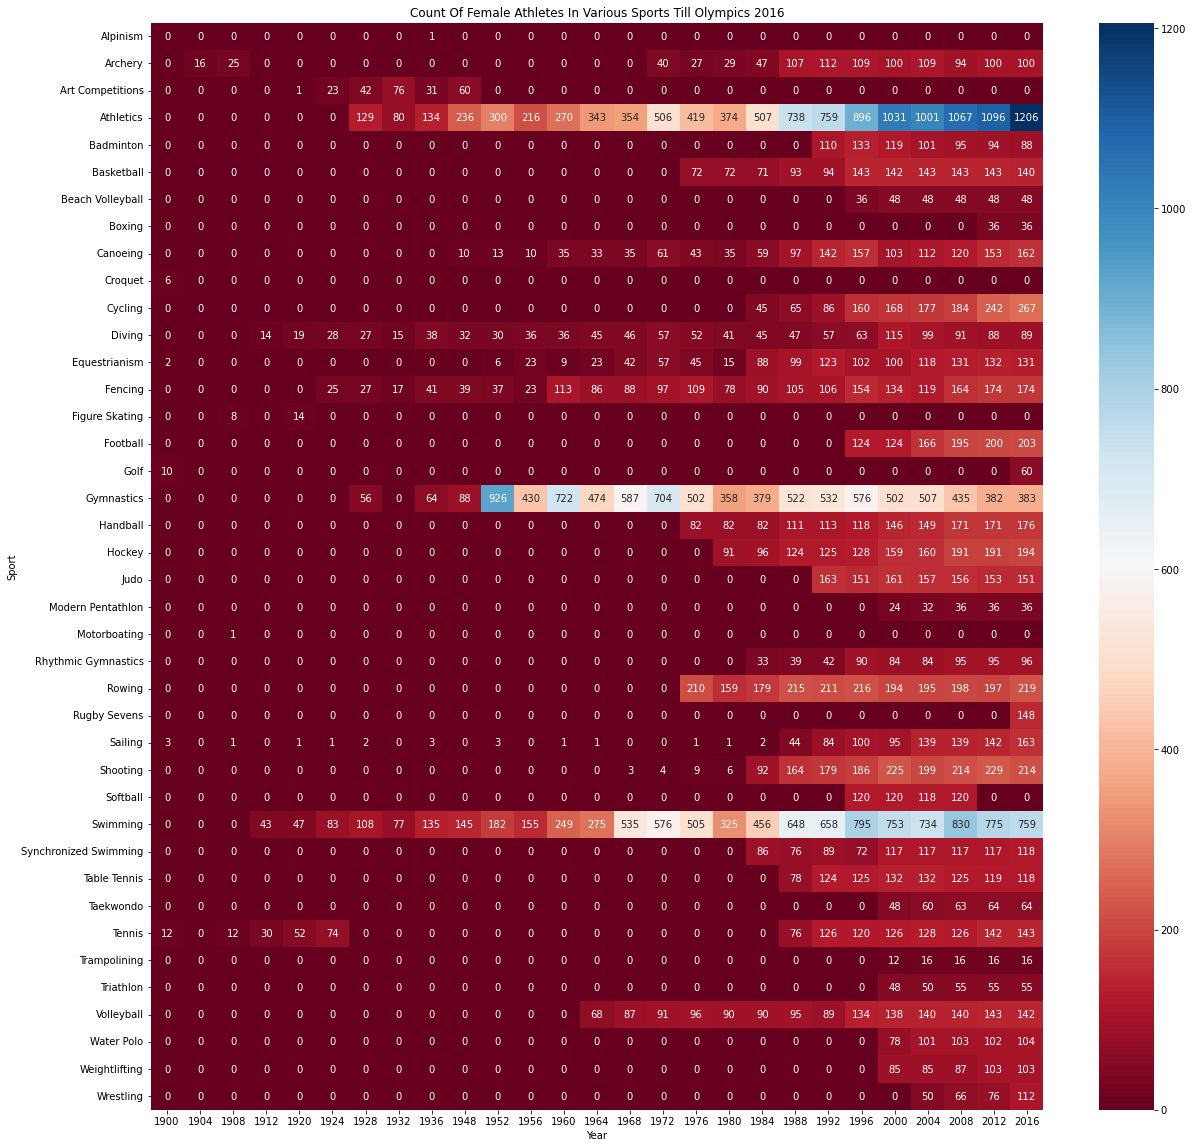

In [60]:
female_overall_sports(female_alone)

The heatmap gives the count of female athletes in various sports over the years.

The donut chart and sunburst gives the top 15 sports in which the female participated.

In [61]:
# Analysis of female participation of each event of Athletics
def female_athletics(final_df):
    female_athletics = final_df[(final_df["Sex"]=="F") & (final_df["Sport"]=="Athletics")]
    print("Number of distinct Athletic events = ",len(female_athletics["Event"].unique()))
    plot_heatmap_year(female_athletics,"Event")
    
    female_athletics = final_df[(final_df["Sex"]=="F") & (final_df["Sport"]=="Athletics")].groupby(["Event"]).count()["Name"].reset_index().rename(columns={"Name":"Total count of participants"})
    female_athletics.sort_values(by="Total count of participants",ascending=False,inplace=True)
    plot_sunburst(female_athletics,'Event','bluyl','Women in Athletic events')

Number of distinct Athletic events =  27


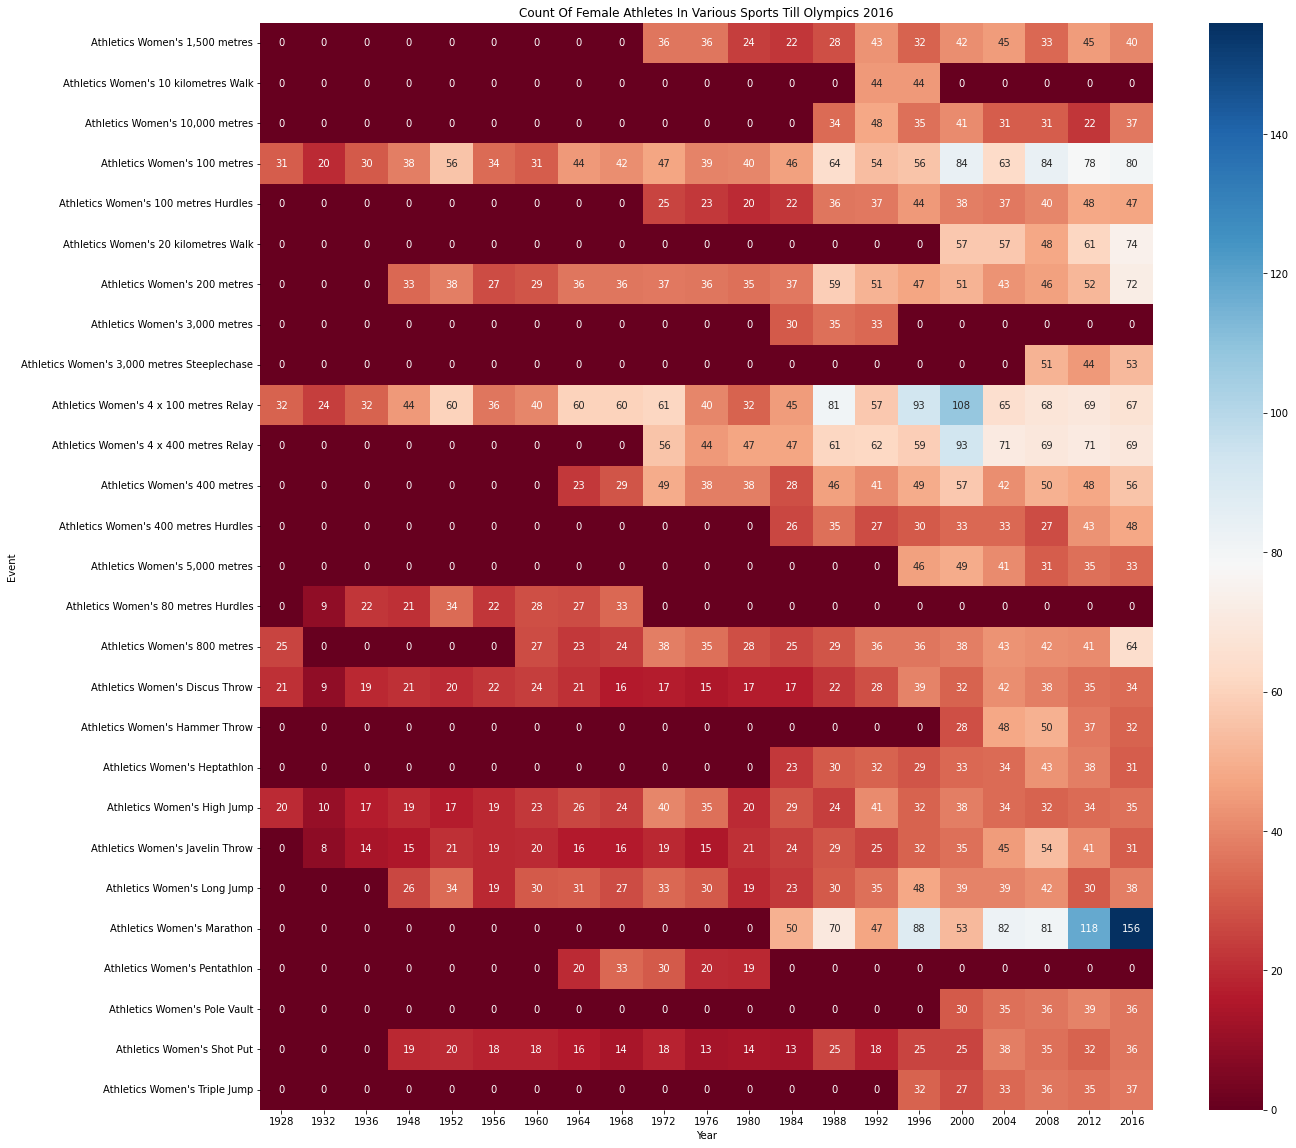

In [62]:
female_athletics(final_df)

The heatmap gives the count of female athletes in various events of Athletics over the years.

The sunburst gives the hierarchical visualisation of the various events in Athletics.

In [63]:
def female_swimmers(final_df):
    
    female_swimmers = final_df[(final_df["Sex"]=="F") & (final_df["Sport"]=="Swimming")]
    print("Number of distinct Swimming events = ",len(female_swimmers["Event"].unique()))
    plot_heatmap_year(female_swimmers,"Event")
    
    female_swimmers = final_df[(final_df["Sex"]=="F") & (final_df["Sport"]=="Swimming")].groupby(["Event"]).count()["Name"].reset_index().rename(columns={"Name":"Total count of participants"})
    female_swimmers.sort_values(by="Total count of participants",ascending=False,inplace=True)
    plot_sunburst(female_swimmers,'Event','bupu','Women in Swimming events')

Number of distinct Swimming events =  18


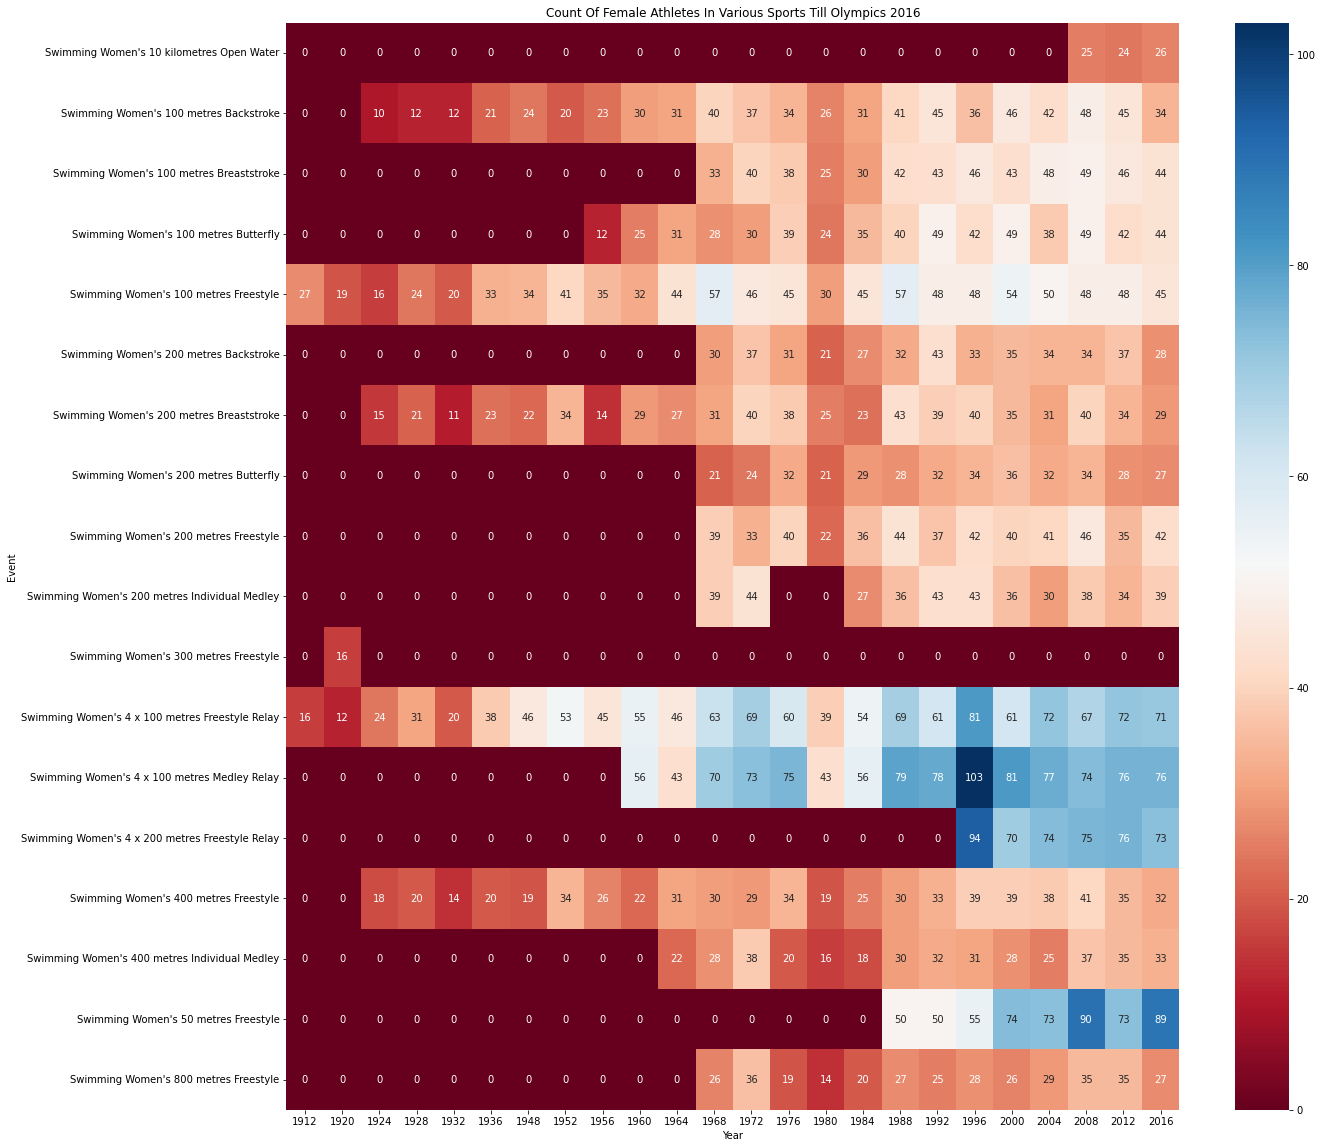

In [64]:
female_swimmers(final_df)

The heatmap gives the count of female swimmers in various events of Swimming over the years.

The sunburst gives the hierarchical visualisation of the various events in Swimming.

# Objective 3 - An analysis on 100 metres.

The anxious wait to find out the fastest man and woman in the world makes the 100m sprint the most marquee event of any Olympics. Here, an analysis was carried out to find out the nation that has dominated the event across the years, by first analysing men, followed by women and then combining their records to find out the most dominant "sprinting" country. Also, certain features of the athletes were looked at, such as Age, Height and Weight, to determine what sets the Champions apart from the contenders.

In [65]:
# The code execution for Objective 3 begins here.
# We rename the column 'region' to Country to begin with.
# Creating a DF for finding the athletes who participated for Men's and Women's 100m in the Olympics.
# athletes_obj3.rename(columns={"region":"Country"},inplace=True)
DF_Track_Event_Athletes = athletes_df2[(athletes_df2['Sport'] == 'Athletics') & ((athletes_df2['Event'] == 'Athletics Men\'s 100 metres') | (athletes_df2['Event'] == 'Athletics Women\'s 100 metres'))].reset_index()
print("The shape of DF_Track_Event_Athletes: ",DF_Track_Event_Athletes.shape)
DF_Track_Event_Athletes.head()

The shape of DF_Track_Event_Athletes:  (2952, 20)


index   ID                                Name Sex   Age      Height  \
0      4    8  Cornelia "Cor" Aalten (-Strannood)   F  18.0  168.000000   
1    141   96   Carlos Rodolfo Abaunza Balladares   M  18.0  168.000000   
2    153  104                     Gana Abba Kimet   M  26.0  134.618548   
3    193  129                      Ruslan Abbasov   M  22.0  181.000000   
4    246  168               Younis Abdallah Rabee   M  23.0  169.000000   

      Weight         Team  NOC        Games  Year  Season         City  \
0  53.581599  Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
1  60.000000    Nicaragua  NCA  2004 Summer  2004  Summer       Athina   
2  53.581599         Chad  CHA  1972 Summer  1972  Summer       Munich   
3  74.000000   Azerbaijan  AZE  2008 Summer  2008  Summer      Beijing   
4  68.000000       Kuwait  KUW  1972 Summer  1972  Summer       Munich   

       Sport                         Event     Medal      Country  Bronze  \
0  Athletics  Athletics Women's 100 metres  No Medal  Netherlands       0   
1  Athletics    Athletics Men's 100 metres  No Medal    Nicaragua       0   
2  Athletics    Athletics Men's 100 metres  No Medal         Chad       0   
3  Athletics    Athletics Men's 100 metres  No Medal   Azerbaijan       0   
4  Athletics    Athletics Men's 100 metres  No Medal       Kuwait       0   

   Gold  Silver  
0     0       0  
1     0       0  
2     0       0  
3     0       0  
4     0       0

In [66]:
# plot_kdeplot() is a method defined for plotting the Kernel-Density-Estimate.
# This method takes in two dataframes as arguments, wherein one of them represents the entire participants, 
# and the other represents the athletes who have won any medal in the event.
# Now, two dataframes are created by selecting just the column that we are using for analysis.
# This is followed by plotting a graph for that particular characteristic, by adding a dynamic title for each.

def plot_kdeplot(DF_All_Athletes, DF_Winners_Only, feature, title_value, legend1, legend2):
    df_all_age = DF_All_Athletes[feature]
    df_winners_age = DF_Winners_Only[feature]
    graph = mm.create_distplot([df_all_age,df_winners_age], [legend1,legend2 ],show_rug = False, show_hist = False)
    graph.layout.update(title = title_value, xaxis_title=feature,yaxis_title="Probability Density")
    graph.show()

In [67]:
# An analysis of Male Sprinters is done here.
# Firstly, we filter the dataframe to select just the males by giving a filter of 'Sex' == 'M'.
# Secondly, we filter the above obtained dataframe to store the athletes who've won atleast a medal into another dataframe.
# This is followed by converting the datatypes of the One-Hot Encoded columns into int64 for our further analysis.
# That dataframe is then passed into create_sprint_medal_table() for creating a country specific medal table.
# The Male medal table is then printed for display.
# We then pass the aforementioned dataframes as arguments, along with the feature and specific title value to the earlier defined plot_kdeplot(). 
# The Male medal table is then returned.

def male_sprinters_analysis(DF_Track_Event_Athletes):
    DF_Track_Event_Male_Athletes = DF_Track_Event_Athletes[DF_Track_Event_Athletes['Sex'] == 'M'] #1891 rows    
    DF_Male_Winners = DF_Track_Event_Male_Athletes[DF_Track_Event_Male_Athletes['Medal'] != 'No Medal'] #85 rows
        
    DF_Male_Winners['Gold'] = DF_Male_Winners['Gold'].astype("int64")
    DF_Male_Winners['Silver'] = DF_Male_Winners['Silver'].astype("int64")
    DF_Male_Winners['Bronze'] = DF_Male_Winners['Bronze'].astype("int64")
    
    Male_Medal_Table = create_sprint_medal_table(DF_Male_Winners)
    print("Men's 100m : All time Medal table: ")
    display(Male_Medal_Table)
    plot_kdeplot(DF_Track_Event_Male_Athletes, DF_Male_Winners,'Age','Probability Of Winning Different Medals With Age','Agewise distribution of All athletes','Agewise distribution of Winners' )
    plot_kdeplot(DF_Track_Event_Male_Athletes, DF_Male_Winners,'Height','Probability Of Winning Different Medals With Height','Height distribution of All athletes','Height distribution of Winners')
    plot_kdeplot(DF_Track_Event_Male_Athletes, DF_Male_Winners,'Weight','Probability Of Winning Different Medals With Weight','Weight distribution of All athletes','Weight distribution of Winners')
    return Male_Medal_Table

In [68]:
# An analysis of Female Sprinters is done here.
# Firstly, we filter the dataframe to select just the females by giving a filter of 'Sex' == 'F'.
# Secondly, we filter the above obtained dataframe to store the athletes who've won atleast a medal into another dataframe.
# This is followed by converting the datatypes of the One-Hot Encoded columns into int64 for our further analysis.
# That dataframe is then passed into create_sprint_medal_table() for creating a country specific medal table.
# The Female medal table is then printed for display.
# We then pass the aforementioned dataframes as arguments, along with the feature and specific title value to the earlier defined plot_kdeplot(). 
# The Female medal table is then returned.

def female_sprinters_analysis(DF_Track_Event_Athletes):
    DF_Track_Event_Female_Athletes = DF_Track_Event_Athletes[DF_Track_Event_Athletes['Sex'] == 'F'] #1061 rows
    DF_Female_Winners = DF_Track_Event_Female_Athletes[DF_Track_Event_Female_Athletes['Medal'] != 'No Medal'] #63 rows

    DF_Female_Winners['Gold'] = DF_Female_Winners['Gold'].astype("int64")
    DF_Female_Winners['Silver'] = DF_Female_Winners['Silver'].astype("int64")
    DF_Female_Winners['Bronze'] = DF_Female_Winners['Bronze'].astype("int64")
    
    Female_Medal_Table = create_sprint_medal_table(DF_Female_Winners)
    print("Women's 100m : All time Medal table: ")
    display(Female_Medal_Table)
    plot_kdeplot(DF_Track_Event_Female_Athletes, DF_Female_Winners,'Age','Probability Of Winning Different Medals With Age','Age distribution of All athletes','Age distribution of Winners')
    plot_kdeplot(DF_Track_Event_Female_Athletes, DF_Female_Winners,'Height','Probability Of Winning Different Medals With Height','Height distribution of All athletes','Height distribution of Winners')
    plot_kdeplot(DF_Track_Event_Female_Athletes, DF_Female_Winners,'Weight','Probability Of Winning Different Medals With Weight','Weight distribution of All athletes','Weight distribution of Winners')
    return Female_Medal_Table

In [69]:
# This is a method defined to create a Country specific Medal table for both Men's and Women's 100m.
# Initially, the dataframe is grouped by 'Country' column, and then the 'Gold','Silver' and 'Bronze' columns are added up.
# A new column, 'Total Medals', is added to find the total number of medals won by the Country.
# This dataframe is then sorted based on Gold,Silver and Bronze columns in the descending order, with their index reset.

def create_sprint_medal_table(DF_Sprinters):
    DF_Winners = DF_Sprinters.groupby(['Country'])[['Gold','Silver','Bronze']].sum().reset_index()
    DF_Winners['Total Medals'] = DF_Winners['Gold'] + DF_Winners['Silver'] + DF_Winners['Bronze']
    return DF_Winners.sort_values(by=['Gold','Silver','Bronze'],ascending=False).reset_index(drop=True)

In [70]:
# This method creates a medal table by combining the Male and Female Medal tables.
# The two dataframes are concatenated, and then grouped on the basis of Country, and the other columns are added up.
# The resulting dataframe is then printed for display and is sorted based on Gold,Silver and Bronze columns in the descending order.
# The sorted dataframe is then returned, with the top 10 countries.

def create_combined_medal_table(DF_Male_Sprinters_Medal_Table, DF_Female_Sprinters_Medal_Table):
    new_df = pd.concat([DF_Male_Sprinters_Medal_Table,DF_Female_Sprinters_Medal_Table]).groupby(['Country']).sum().reset_index()
    print("The combined 100m Medal table is :")
    display(new_df.sort_values(by=['Gold','Silver','Bronze'], ascending = False).reset_index(drop=True))
    return new_df.sort_values(by=['Gold','Silver','Bronze'], ascending = False).head(10)

In [71]:
# This method is used to show the geographical distribution of medals on a map.

def plot_choropleth(DF_Medal, max_value, title_value):
    fig_map = px.choropleth(DF_Medal, locations="Country",color="Total Medals", locationmode="country names", 
                       range_color=(0,max_value+1), title=title_value, width=800, height=600)
    fig_map.show()

In [72]:
# This method plots a grouped barchart, with the X axis representing Country and Y axis representing the medal count.
# The two input arguments are the dataframe, and the title value which needs to be shown, and is dynamic.

def plot_grouped_barchart(dataframe,title_value):
    fig = go.Figure(data=[go.Bar(name='Gold', x=dataframe['Country'], y=dataframe['Gold'],marker=dict(color='#ffff14')),
                        go.Bar(name='Silver', x=dataframe['Country'], y=dataframe['Silver'],marker=dict(color='#C0C0C0')),
                        go.Bar(name='Bronze', x=dataframe['Country'], y=dataframe['Bronze'],marker=dict(color='#b08d57'))])
    # Change the bar mode
    fig.update_layout(barmode='group',title=title_value)
    fig.show()

After having defined all the methods that are to be used, we can now start the analysis.

In [73]:
# We create a medal table dataframe for men by using an already defined method, male_sprinters_analysis().
DF_Male_Sprinters_Medal_Table = male_sprinters_analysis(DF_Track_Event_Athletes)

Men's 100m : All time Medal table: 


Country  Gold  Silver  Bronze  Total Medals
0            USA    16      14       9            39
1        Jamaica     3       4       1             8
2             UK     3       2       3             8
3         Canada     2       0       4             6
4       Trinidad     1       2       1             4
5        Germany     1       1       2             4
6         Russia     1       0       1             2
7   South Africa     1       0       0             1
8           Cuba     0       2       0             2
9        Namibia     0       2       0             2
10      Portugal     0       1       0             1
11     Australia     0       0       2             2
12      Barbados     0       0       1             1
13      Bulgaria     0       0       1             1
14       Hungary     0       0       1             1
15   Netherlands     0       0       1             1
16   New Zealand     0       0       1             1
17        Panama     0       0       1             1

In [74]:
# We create a medal table dataframe for women by using an already defined method, female_sprinters_analysis().
DF_Female_Sprinters_Medal_Table = female_sprinters_analysis(DF_Track_Event_Athletes)

Women's 100m : All time Medal table: 


Country  Gold  Silver  Bronze  Total Medals
0            USA     9       7       2            18
1        Jamaica     3       5       5            13
2        Germany     2       3       4             9
3      Australia     2       1       3             6
4         Poland     1       1       2             4
5         Russia     1       0       1             2
6        Belarus     1       0       0             1
7    Netherlands     1       0       0             1
8         Canada     0       2       1             3
9             UK     0       2       0             2
10        Greece     0       1       0             1
11  South Africa     0       1       0             1
12          Cuba     0       0       1             1
13         Italy     0       0       1             1

In [75]:
# We create the combined medal table dataframe.
DF_Combined_Sprinter_Medal_Table = create_combined_medal_table(DF_Male_Sprinters_Medal_Table, DF_Female_Sprinters_Medal_Table)

The combined 100m Medal table is :


Country  Gold  Silver  Bronze  Total Medals
0            USA    25      21      11            57
1        Jamaica     6       9       6            21
2        Germany     3       4       6            13
3             UK     3       4       3            10
4         Canada     2       2       5             9
5      Australia     2       1       5             8
6         Russia     2       0       2             4
7       Trinidad     1       2       1             4
8         Poland     1       1       2             4
9   South Africa     1       1       0             2
10   Netherlands     1       0       1             2
11       Belarus     1       0       0             1
12          Cuba     0       2       1             3
13       Namibia     0       2       0             2
14        Greece     0       1       0             1
15      Portugal     0       1       0             1
16      Barbados     0       0       1             1
17      Bulgaria     0       0       1             1
18       Hungary     0       0       1             1
19         Italy     0       0       1             1
20   New Zealand     0       0       1             1
21        Panama     0       0       1             1

In [76]:
# Grouped barcharts are plotted for the Top 10 countries in both Men's and Women's 100m, along with the combined one.
plot_grouped_barchart(DF_Male_Sprinters_Medal_Table.head(10), "Top 10 Countries Which Dominated Men's 100 Metres:")
plot_grouped_barchart(DF_Female_Sprinters_Medal_Table.head(10), "Top 10 Countries Which Dominated Women's 100 Metres:")
plot_grouped_barchart(DF_Combined_Sprinter_Medal_Table.head(10), "Top 10 Countries Which Dominated 100 Metres:")

In [77]:
# This is then followed by plotting Choropleths to show the geographical distribution of the medal tables.
plot_choropleth(DF_Male_Sprinters_Medal_Table, DF_Male_Sprinters_Medal_Table['Total Medals'].max(), "Dominating Countries In Men's 100 Metres:")
plot_choropleth(DF_Female_Sprinters_Medal_Table, DF_Female_Sprinters_Medal_Table['Total Medals'].max(),"Dominating Countries In Women's 100 Metres:")    

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results

The main aim of this project was to analyse the various aspects of the Olympics over a while from 1896 to 2016. For this, we investigated the data using three main objectives. For the first objective, we checked how dominant each country is along with the participation of each country and found out the ten most superior countries. The USA is miles ahead of its nearest competitor, exerting its dominance in the Olympics. In our second objective, female participation over the years was looked at and found out that Athletics and Swimming had a larger proportion among female participants. And in our final objective, we got to conclude that the USA has been ruling the tracks for a long time irrespective of gender, and the various physical features of the winners were identified.

## Objective 1

### Explanation of Results

The first objective was to find the ten most dominant countries in the Olympics and the top countries having maximum participation in Olympics. As evident from the below graph, the USA is well and truly the most dominant country in the Olympics with a total of 2522 medals, followed by Russia, having 1577 medals in total, which is much less when compared to the USA. Germany managed to get 1378 medals as a whole, followed by the UK and France, with 870 and 736 respectively. The rest of the countries on the list have won less than 600 medals with Sweden and Hungary winning 499 and 494 medals respectively.

The second bar graph focuses on the overall participation of countries in the Olympics. As expected, the USA leads the way with a participation count close to 6000. Germany has sent 4899 participants to the Olympics and occupies the second spot. Japan and Hungary have sent the least number of participants from this least, with a count of close to 2800.

By analyzing the genderwise participation of countries, from the third bar graph in this section, again USA tops with more than 4000 men and 1800 women, followed by Germany with almost 3400 men and 1500 women. Overall, the USA has dominance over all other countries in case of success as well as participation.



# Visualisation


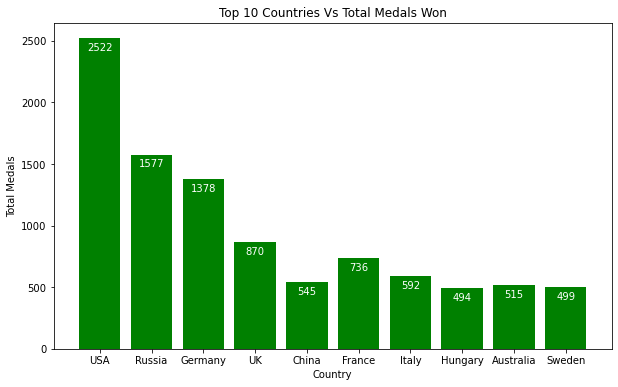

In [78]:
# A bar graph is used with total medals won displayed on each bar to visualize the above analysis.
# A dataframe is created to select top 10 countries from medal_rank_dataframe 
COUNTRY_DF=medal_rank_dataframe['Country'][:10]
# A dataframe is created to select corresponding total medals won by top 10 countries from medal_rank_dataframe 
TOP_Total_Medals=medal_rank_dataframe['Total_Medals'][:10]
# Code is as follows
COUNTRIES=[]
Total_Medals=[]
for i in range(len(COUNTRY_DF)):
    COUNTRIES.append(medal_rank_dataframe['Country'].iloc[i])
for i in range(len(TOP_Total_Medals)):
    Total_Medals.append(medal_rank_dataframe['Total_Medals'].iloc[i])  
#created a dictionary with keys as COUNTRIES and values as Total_Medals
DD=dict(zip(COUNTRIES,Total_Medals))  
# using plt package and bar graph to display
plt.figure(figsize=(10,6))
plt.bar(COUNTRIES,Total_Medals,color='green')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.title('Top 10 Countries Vs Total Medals Won')
# For displaying countries in descending order 
sorted_dd_items=sorted(DD.items(),key= lambda x: (x[1],x[0]))
for k,v in sorted_dd_items:
     plt.text(k,v-100,int(v),horizontalalignment='center',color='w')
plt.show()

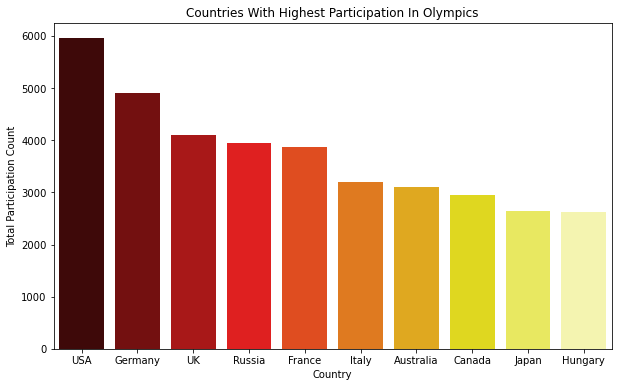

In [79]:
# A seaborn barplot is used to display the top countries with biggest overall participation 
plt.figure(figsize=(10,6))
# select top 10 countries
x=top_participated_countries['Country'][:10]
# selected corresponding particpation count of each country
y=top_participated_countries['Total Participation Count'][:10]
#z=top_participated_countries['Total Participation Percentage']
sns.barplot(x,y,palette='hot')
plt.title('Countries With Highest Participation In Olympics')
plt.show()

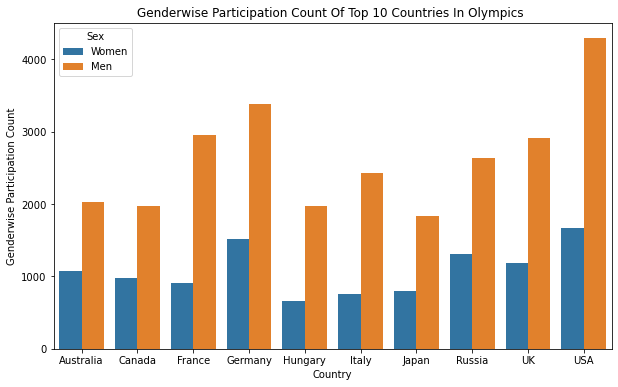

In [80]:
# A seaborn barplot is used for this analysis
plt.figure(figsize=(10,6))
# select top 10 countries
x=gh['Country']
# selected corresponding particpation count of each country
y=gh['Genderwise Participation Count']
#z=top_participated_countries['Total Participation Percentage']
sns.barplot(x,y,hue='Sex',data=gh)
plt.title('Genderwise Participation Count Of Top 10 Countries In Olympics ')
plt.show()

## Objective 2 
### Explanation of Results

Here, the analyses are done to explore and emphasise female participation in Olympics over the years till 2016. Further, it focuses on the top two sports events with more female participation.

The global map throws light on the geographical distribution of overall female participation in Olympic games till 2016. Here, the USA has sent 2084 different females to represent the nation in Olympics, with South Sudan sending the least, with just one female athlete. So far, 206 countries have sent 28840 unique female athletes to represent them.

The heatmap gives the count of female athletes in various sports across the different editions of the games. 40 distinct sports had female participation over the years. It also gives an idea about the progression of various sports with the editions, as a lot of these sports had no competitors in the early 20th century. For example, Athletics started in 1928 with 129 athletes and has increased nearly tenfold to reach 1206 competitors in 2016, whereas Tennis had female competitors in the first quarter of the 1900s followed by which it was discontinued for 64 years, and was then resumed in the late 1980s.

A sunburst chart and donut chart were plotted to visualise the sports which had maximum female participation over the years. Athletics, Swimming and Gymnastics were of significant interest for women, accounting for 24%, 20.3% and 18.8% respectively considering female competitors in the top 15 sports.

A detailed analysis was then performed on the top two sports to derive insights on the most popular events in the same. We could see from the heatmap that only 4 common athletic events were contested in every Olympics from its inception. Also, there were just five athletic events with 129 participants in 1928. It was seen that in Athletics, there were a total of 27 distinct events.

From the sunburst chart, it is evident that each event had a different number of participants, and the maximum participation was seen for the Women's 4x100 metres Relay, having a count of 1174, and was followed by Women's 100 metres and Women's 200 metres.

Similarly, the heatmap and sunburst for Swimming were plotted for analysing the trends. There were 18 distinct swimming events, starting from 1912 and just 2 events happened throughout the Olympic history.

Women's 4x100 metres Freestyle Relay and Women's 4x100 metres Medley Relay were the two most attractive events with 1225 and 1060 swimmers in them.
### Visualisation

In [81]:
# Analysis on the entire female participation of athletes in olympics
# The global map with the distribution of female participants in different countries are displayed. The dataframe of this distribution is also displayed.
female_overall(female_alone)

The total number of unique female participants =  28840


Country  Total number of Participants
0                        USA                          2084
1                    Germany                          1690
2                     Russia                          1438
3                         UK                          1385
4                      China                          1329
..                       ...                           ...
201  Virgin Islands, British                             3
202                   Brunei                             2
203                   Monaco                             2
204                    Nauru                             2
205              South Sudan                             1

[206 rows x 2 columns]

Number of distinct Sports =  40


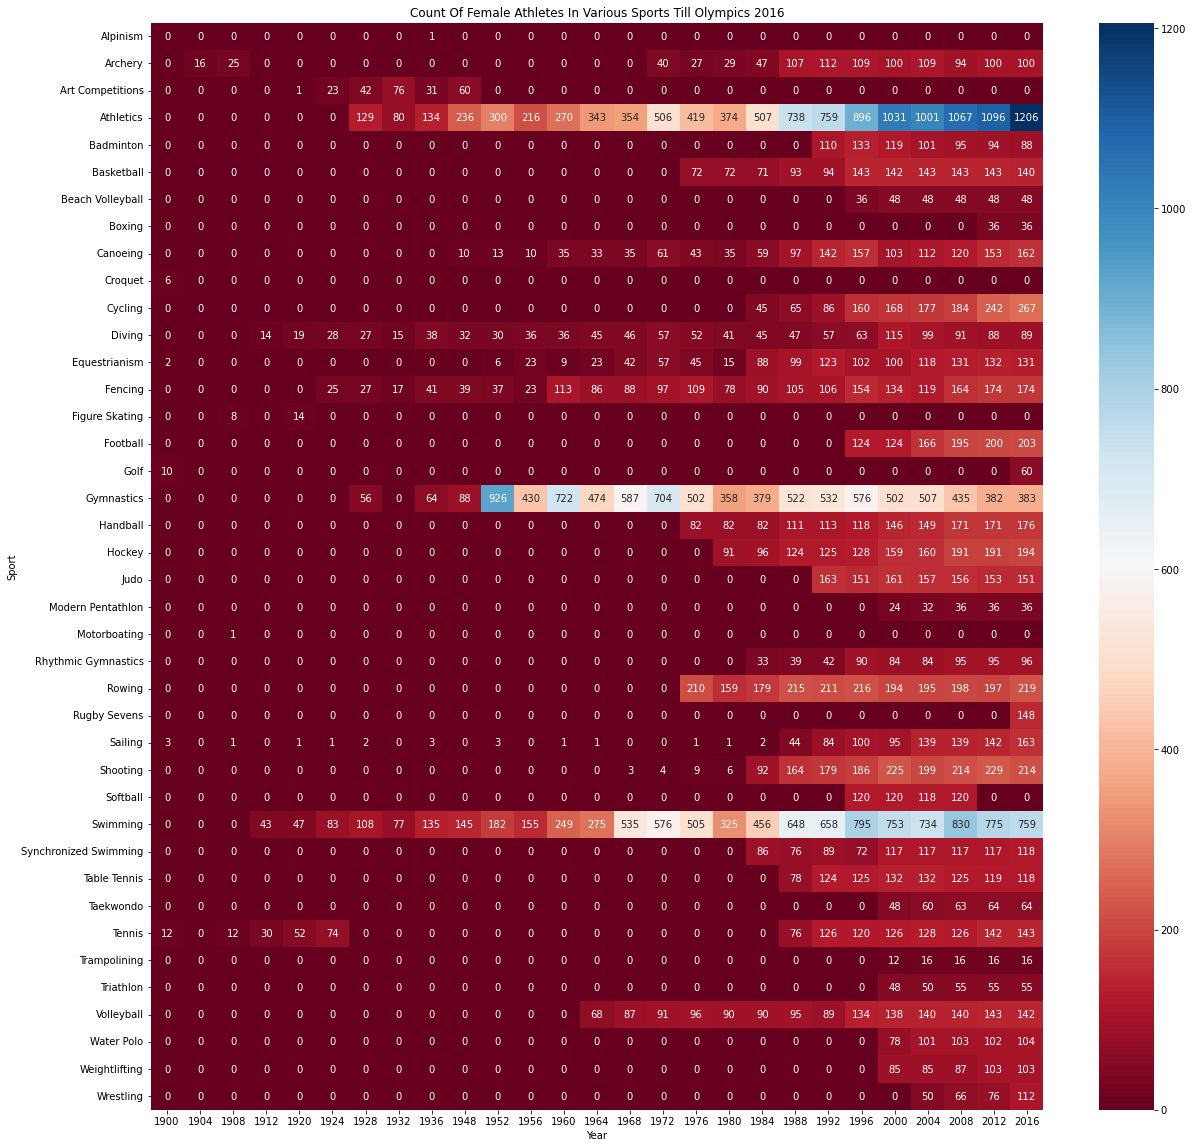

In [82]:
# The heatmap gives the count of female athletes in various sports over the years.
# The doughnut chart and sunburst gives the top 15 sports in which the female participated.
female_overall_sports(female_alone)

Number of distinct Athletic events =  27


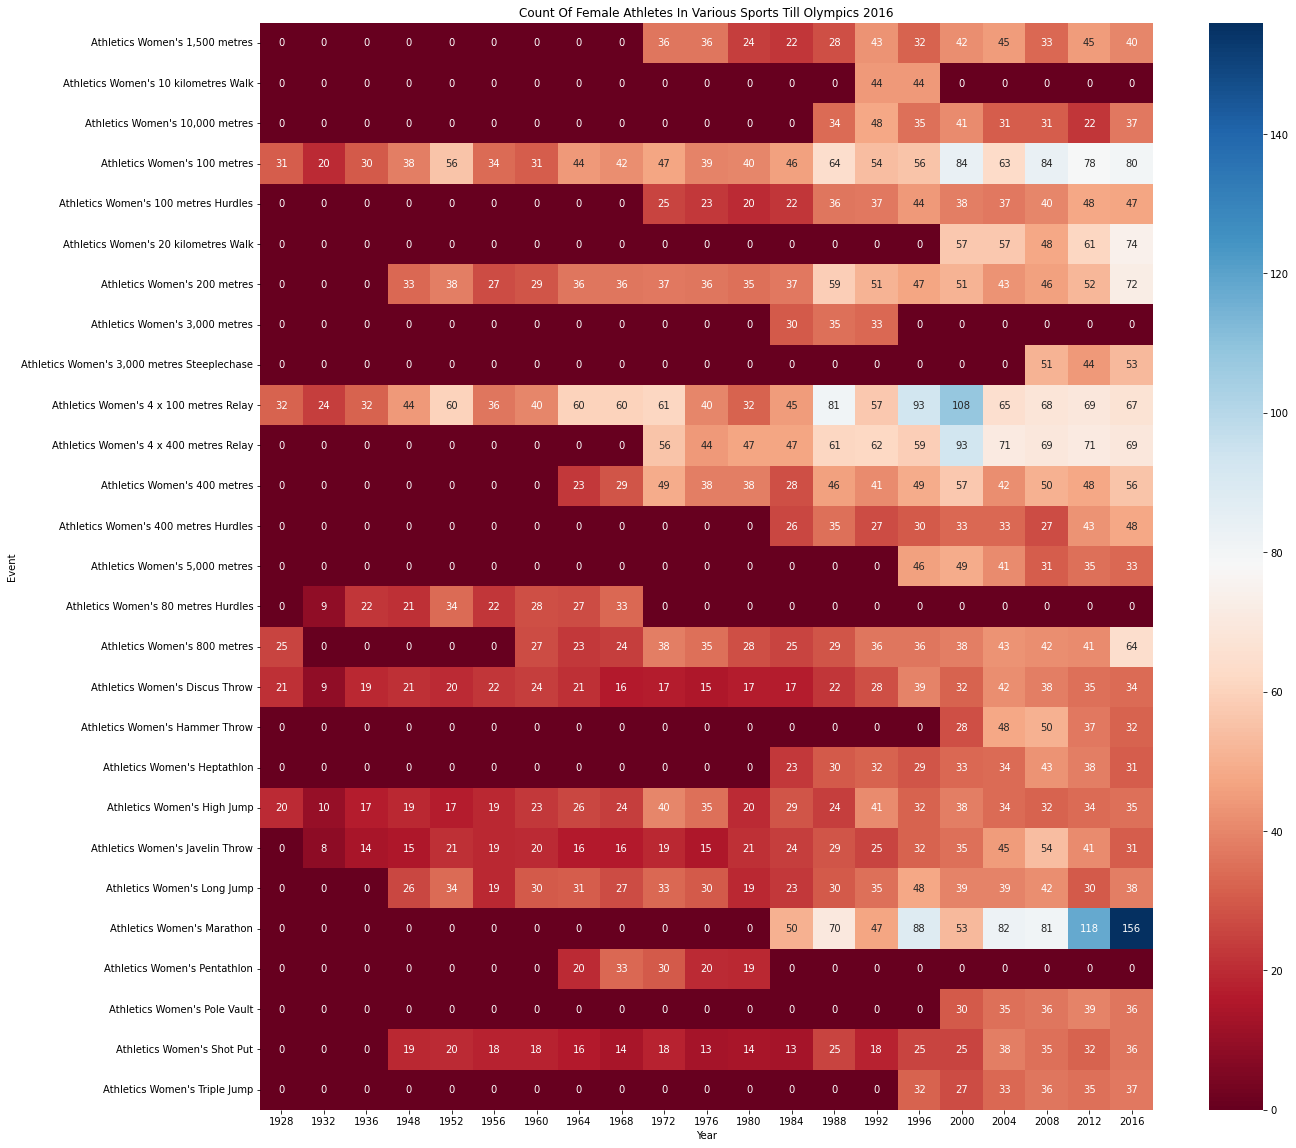

In [83]:
# The heatmap gives the count of female athletes in various events of Athletics over the years.
# The sunburst gives the hierarchical visualisation of the various events in Athletics.
female_athletics(final_df)

Number of distinct Swimming events =  18


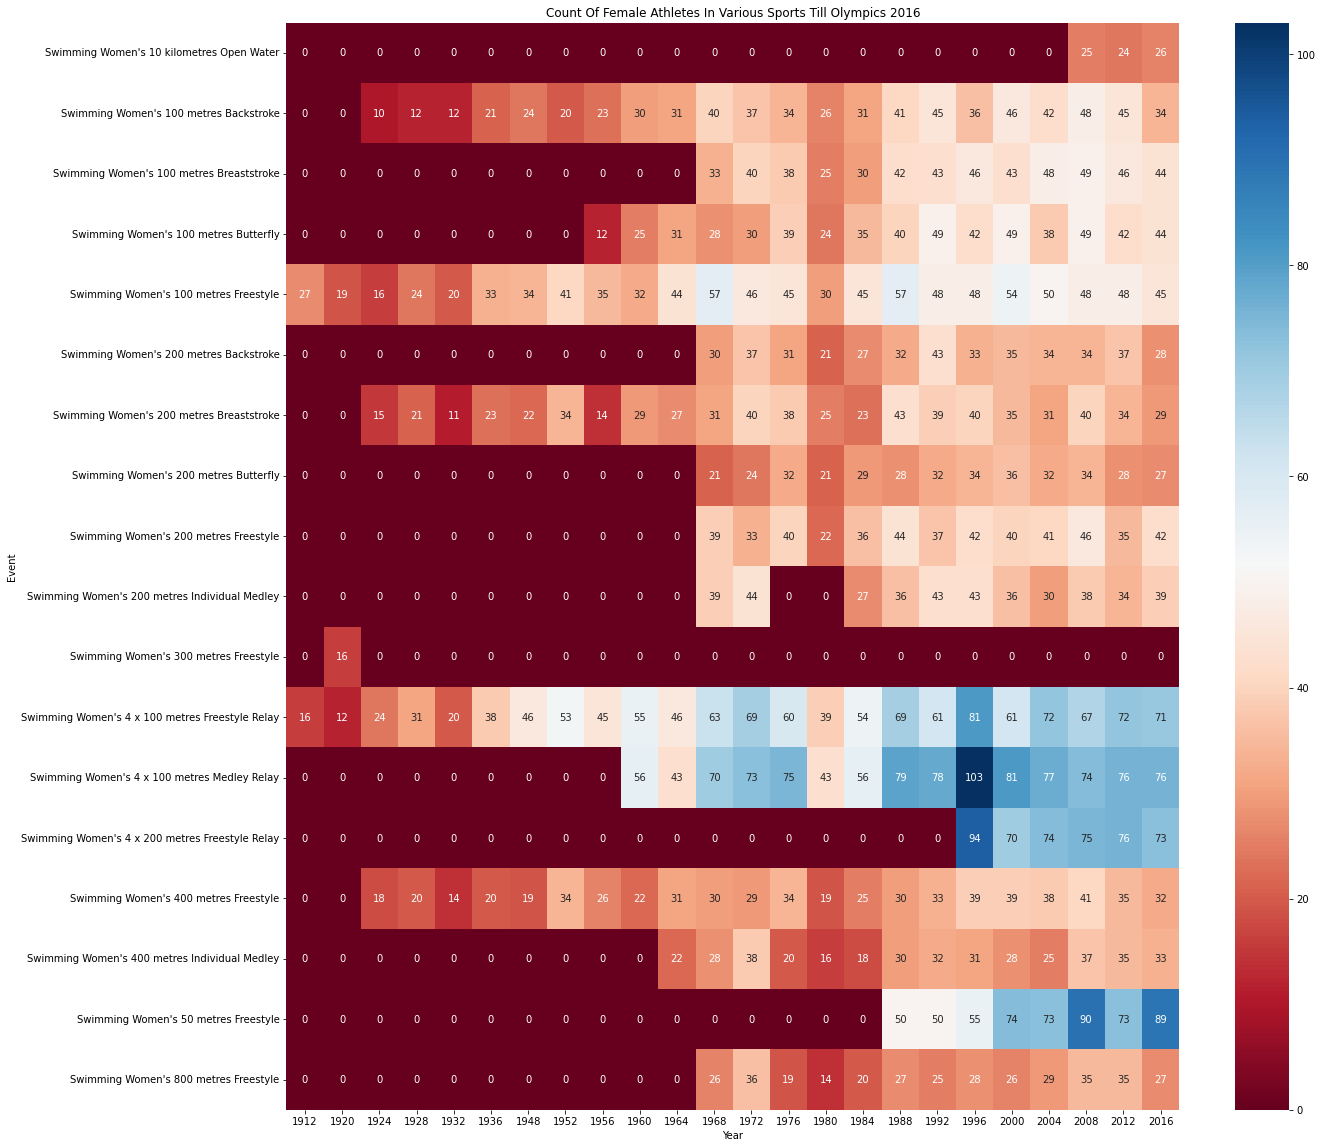

In [84]:
# The heatmap gives the count of female athletes in various events of Swimming over the years.
# The sunburst gives the hierarchical visualisation of the various events in Swimming.
female_swimmers(final_df)

## Objective 3
### Explanation of Results

The primary objective was to find out the countries which dominated Men's 100m and Women's 100m in the entire Olympic history until 2016. Through our analyses, we were able to find that the USA has been an absolute powerhouse in the Men's 100m, by bagging a whopping 16 Gold, 14 Silver and 9 Bronze medals. Their domination can be stressed further by the fact that no other country's cumulative total is as much the USA's Bronze tally.

Moving over to the Women's 100m, the USA has maintained their supremacy by grabbing 9 Gold, 7 Silver and 2 Bronze medals, and have brushed aside their nearest competitors, Jamaica, who have 3 Gold, 5 Silver and 5 Bronze medals. They are the only two countries having more than ten medals amongst women. USA and Jamaica occupy the top two spots in the combined table of both Men and Women.

A choropleth map was plotted to see the geographical distribution of the Medal tally. The Men’s distribution highlights that North America, Europe and Africa have fared well in the event, with Asia, Australia and South America having nothing to show for their endeavours. Similarly, in the Women’s distribution map, North America and Europe continue to exert their dominance with Australia also chipping in. That leaves Asia, Africa and South America as mere onlookers in the event.

From the KDE plots drawn to detect any patterns in the distribution of Age, Height and Weight, we were able to understand that:

• For Men:

* 1.Age: The highest probability to obtain a medal was found to be at an age of 22.90. It is also higher than the peak of the age distribution for all the participants.
* 2.Height: A male athlete of height 180.41cm had the highest chance of getting a medal when compared to the other
    competitors.
* 3.Weight: Male sprinters weighing 77.11kg had the highest chance of winning the coveted Olympic medal. 

• For Women:

*   1.Age: Just like men, female athletes had the highest probability to be an Olympic medal winner at the age of 22.48.
*   2.Height: Female sprinters with a height of 169.6cm stood the largest chance of bagging an Olympic medal, as the height
    distribution points to the largest probability density at that point.
*   3.Weight: The KDE plot tells us that the medal winners had the highest probability of winning a medal if they weighed
    58.25kg.

### Visualisation

In [85]:
# We create a medal table dataframe for men by using an already defined method, male_sprinters_analysis().
DF_Male_Sprinters_Medal_Table = male_sprinters_analysis(DF_Track_Event_Athletes)

Men's 100m : All time Medal table: 


Country  Gold  Silver  Bronze  Total Medals
0            USA    16      14       9            39
1        Jamaica     3       4       1             8
2             UK     3       2       3             8
3         Canada     2       0       4             6
4       Trinidad     1       2       1             4
5        Germany     1       1       2             4
6         Russia     1       0       1             2
7   South Africa     1       0       0             1
8           Cuba     0       2       0             2
9        Namibia     0       2       0             2
10      Portugal     0       1       0             1
11     Australia     0       0       2             2
12      Barbados     0       0       1             1
13      Bulgaria     0       0       1             1
14       Hungary     0       0       1             1
15   Netherlands     0       0       1             1
16   New Zealand     0       0       1             1
17        Panama     0       0       1             1

In [86]:
# We create a medal table dataframe for women by using an already defined method, female_sprinters_analysis().
DF_Female_Sprinters_Medal_Table = female_sprinters_analysis(DF_Track_Event_Athletes)

Women's 100m : All time Medal table: 


Country  Gold  Silver  Bronze  Total Medals
0            USA     9       7       2            18
1        Jamaica     3       5       5            13
2        Germany     2       3       4             9
3      Australia     2       1       3             6
4         Poland     1       1       2             4
5         Russia     1       0       1             2
6        Belarus     1       0       0             1
7    Netherlands     1       0       0             1
8         Canada     0       2       1             3
9             UK     0       2       0             2
10        Greece     0       1       0             1
11  South Africa     0       1       0             1
12          Cuba     0       0       1             1
13         Italy     0       0       1             1

In [87]:
# We create the combined medal table dataframe.
DF_Combined_Sprinter_Medal_Table = create_combined_medal_table(DF_Male_Sprinters_Medal_Table, DF_Female_Sprinters_Medal_Table)

The combined 100m Medal table is :


Country  Gold  Silver  Bronze  Total Medals
0            USA    25      21      11            57
1        Jamaica     6       9       6            21
2        Germany     3       4       6            13
3             UK     3       4       3            10
4         Canada     2       2       5             9
5      Australia     2       1       5             8
6         Russia     2       0       2             4
7       Trinidad     1       2       1             4
8         Poland     1       1       2             4
9   South Africa     1       1       0             2
10   Netherlands     1       0       1             2
11       Belarus     1       0       0             1
12          Cuba     0       2       1             3
13       Namibia     0       2       0             2
14        Greece     0       1       0             1
15      Portugal     0       1       0             1
16      Barbados     0       0       1             1
17      Bulgaria     0       0       1             1
18       Hungary     0       0       1             1
19         Italy     0       0       1             1
20   New Zealand     0       0       1             1
21        Panama     0       0       1             1

In [88]:
# Grouped barcharts are plotted for the Top 10 countries in both Men's and Women's 100m, along with the combined one.
plot_grouped_barchart(DF_Male_Sprinters_Medal_Table.head(10), "Top 10 Countries Which Dominated Men's 100 Metres:")
plot_grouped_barchart(DF_Female_Sprinters_Medal_Table.head(10), "Top 10 Countries Which Dominated Women's 100 Metres:")
plot_grouped_barchart(DF_Combined_Sprinter_Medal_Table.head(10), "Top 10 Countries Which Dominated 100 Metres:")

In [89]:
# This is then followed by plotting Choropleths to show the geographical distribution of the medal tables.
plot_choropleth(DF_Male_Sprinters_Medal_Table, DF_Male_Sprinters_Medal_Table['Total Medals'].max(), "Dominating Countries In Men's 100 Metres:")
plot_choropleth(DF_Female_Sprinters_Medal_Table, DF_Female_Sprinters_Medal_Table['Total Medals'].max(),"Dominating Countries In Women's 100 Metres:")    

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections.__

### Achievements
The main objectives analysed in this report are the overall participation of different countries and athletes in the Olympic games till 2016, the history of female participation in the Olympics and the overall analysis of 100 metres. After doing the analysis, it was observed that the USA had the maximum participation in the games based on competitor count and also had the highest medal tally. The analyses on female presence in Olympic games depicted significant progress in the number of females participating in the games since their first involvement in 1900. It was also observed that Athletics was the most prominent sport and 100 metres event was the most notable event. KDE plots were drawn to detect any patterns in the distribution of Age, Height and Weight and it was seen that the medal winners clearly stood apart from their challengers in terms of their physical shape. The USA was the most dominant country in terms of success and participation.

### Limitations

The dataset doesn’t provide details about participants of the 2020 Tokyo Olympic games. So, the analysis based on the effect of Covid-19 pandemic on the overall participation in Sports wasn’t possible. Also, there were missing values in the dataset which could have affected the data quality. In addition, the 1906 Olympic games weren’t recognized by the International Olympic Committee, so these records had to be dropped. Also, the NOC code for Singapore was wrongly given in the 'noc_regions.csv' file. This was corrected manually to 'SGP' in the CSV file itself.

### Future Work

We can do further analysis on the success of the USA in the Olympic games to find the factors contributing to more involvement of athletes in these games.

# Grading

_Feedback and marks will be given here._

### Feedback

### Marks

In [90]:
DATA   = 10
AIMS   =  5
DESIGN = 5

CODE = 15

OUTCOME_EXPLANATION   = 10
OUTCOME_VISUALISATION = 10

CONCLUSION = 5

TOTAL = ( DATA + AIMS + DESIGN + CODE 
          + OUTCOME_VISUALISATION + OUTCOME_VISUALISATION
          + CONCLUSION )
TOTAL

60